In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
#from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

In [3]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [5]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [6]:
def disCharging_df(df):
    '''
    #df_ndis =df_gross.dropna(subset = ['nDis'])
    #df_copy = df_gross.copy()
    df_cop = df[['COP']]
    #print (df_cop.to_string())
    df['cop_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.2), 0, df.COP)
    #print (df_copy['cop_copied'].to_string())
    df_zeroCop = df[['cop_copied']]
    #df_zeroCop
    df_All_zeroCOP = df.loc[df['cop_copied']==0]
    #df_All_zeroCOP[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #print (df_All_zeroCOP[['dateTime']].to_string())
    #df_All_zeroCOP
    '''
    
    #1. tem during discharging 
    df_discharging_time =df.loc[df['flowLoad']>10 ][['dateTime']]

    df_discharging_all = df[df.index.isin(df_discharging_time.index)]

    df_discharging_Tem = df_discharging_all[['T0', 'T1', 'T2', 'T3','T4',\
                                             'T5', 'T6', 'T7', 'T8', 'T9']].reset_index(drop=True)
    #print (df_discharging_Tem )
    #2. nDischarging values
    df_nDis= df.dropna(subset = ['nDis'])
    df_nDis= df_nDis[['nDis']].dropna().reset_index(drop=True)
    #print (df_nDis.to_string())
    #print (df_nDis)
    
    #3. nstratDischarging values
    df_nStratDis = df.dropna(subset = ['nStratDischarge'])
    df_nStratDis = df_nStratDis[['nStratDischarge']] 
    df_nStratDis = df_nStratDis[df_nStratDis>0].dropna().reset_index(drop=True)
    #print (nStratDis.to_string())
    #df_nStratDis
    #print (df_nStratDis)
    
    
    #4. mload values
    df_mload = df_gross.loc[df_gross['flowLoad']>10 ][['flowLoad']].reset_index(drop=True)
    #print (df_mload)

    len_small = min (len(df_discharging_Tem), len(df_nDis), len(df_nStratDis), len(df_mload) )
    
    df_discharging_trunc_Tem =  df_discharging_Tem.iloc[:len_small]
    df_trunc_nDis = df_nDis.iloc[:len_small]
    df_trunc_nStratDis = df_nStratDis.iloc[:len_small]
    df_trunc_mload = df_mload[:len_small]
    l_ist = [df_discharging_trunc_Tem, df_trunc_mload, df_trunc_nDis,df_trunc_nStratDis ]
    df =  pd.concat(l_ist, axis=1)

    return df

disChargingIn_df= disCharging_df(df_gross)
disChargingIn_df

T0       T1       T2       T3       T4       T5       T6       T7  \
0    34.8480  50.7970  51.3084  51.8880  52.2290  52.8088  52.8770  53.0817   
1    34.8140  50.8311  51.3084  51.9221  52.2631  52.8770  52.8770  53.0476   
2    34.7801  50.7629  51.3084  51.8539  52.2290  52.8770  52.9111  53.0817   
3    35.1533  50.0131  51.2402  51.8539  52.2290  52.8770  52.8770  53.0476   
4    35.9338  48.8546  51.2402  51.8880  52.1608  52.8429  52.8770  53.0476   
..       ...      ...      ...      ...      ...      ...      ...      ...   
378  21.6093  21.6430  21.4065  21.3051  21.0686  21.2038  21.4741  23.2317   
379  21.5755  21.6430  21.3727  21.3727  21.1024  21.3727  21.4741  23.2317   
380  21.5755  21.6430  21.4065  21.3389  21.1362  21.1700  21.4403  23.1640   
381  21.5755  21.6768  21.4065  21.2714  21.1700  21.3051  21.4403  23.1640   
382  21.6093  21.7444  21.4065  21.3389  21.2038  21.2038  21.4065  23.0626   

          T8       T9  flowLoad      nDis  nStratDischarge  
0    53.1499  53.0476   413.206  0.006901         0.031045  
1    53.1840  52.9793   587.586  0.004290         0.148028  
2    53.2181  52.9452   575.750  0.005505         0.214233  
3    53.1158  53.0476   551.289  0.007821         0.274274  
4    53.0817  53.0476   552.868  0.010405         0.332932  
..       ...      ...       ...       ...              ...  
378  27.2911  46.6409   505.525  0.921207         0.975399  
379  27.1219  46.4707   508.681  0.924956         0.975067  
380  26.9188  46.0622   511.837  0.928410         0.975582  
381  26.7496  45.7899   514.204  0.932715         0.975714  
382  26.6142  45.3814   518.938  0.938197         0.975881  

[383 rows x 13 columns]

In [7]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [8]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [9]:

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), m.iloc[i-k:i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys


In [10]:
def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler


In [11]:
df_Dis_nrm, scaler = normalize(disChargingIn_df)
df_Dis_nrm = pd.DataFrame(df_Dis_nrm)
df_Dis_nrm.columns = disChargingIn_df.columns
df_Dis_nrm

T0        T1        T2        T3        T4        T5        T6  \
0    0.800915  0.997706  1.000000  0.997787  0.997821  0.995703  0.997835   
1    0.796482  1.000000  1.000000  1.000000  1.000000  1.000000  0.997835   
2    0.792063  0.995412  1.000000  0.995574  0.997821  1.000000  1.000000   
3    0.840719  0.944969  0.995494  0.995574  0.997821  1.000000  0.997835   
4    0.942478  0.867031  0.995494  0.997787  0.993462  0.997851  0.997835   
..        ...       ...       ...       ...       ...       ...       ...   
378 -0.925099 -0.963631 -0.975444 -0.986846 -0.993526 -0.995740 -0.995709   
379 -0.929505 -0.963631 -0.977677 -0.982459 -0.991366 -0.985098 -0.995709   
380 -0.929505 -0.963631 -0.975444 -0.984653 -0.989206 -0.997870 -0.997854   
381 -0.929505 -0.961357 -0.975444 -0.989033 -0.987046 -0.989358 -0.997854   
382 -0.925099 -0.956809 -0.975444 -0.984653 -0.984886 -0.995740 -1.000000   

           T7        T8        T9  flowLoad      nDis  nStratDischarge  
0    0.997731  0.994873  1.000000 -1.000000 -0.994409        -1.000000  
1    0.995461  0.997436  0.982182  0.982064 -1.000000        -0.752373  
2    0.997731  1.000000  0.973285  0.847532 -0.997398        -0.612232  
3    0.995461  0.992309  1.000000  0.569500 -0.992440        -0.485141  
4    0.995461  0.989746  1.000000  0.587447 -0.986906        -0.360975  
..        ...       ...       ...       ...       ...              ...  
378 -0.988747 -0.949113 -0.671415  0.049330  0.963616         0.998978  
379 -0.988747 -0.961833 -0.715817  0.085202  0.971643         0.998277  
380 -0.993252 -0.977101 -0.822389  0.121074  0.979040         0.999368  
381 -0.993252 -0.989821 -0.893428  0.147978  0.988260         0.999646  
382 -1.000000 -1.000000 -1.000000  0.201787  1.000000         1.000000  

[383 rows x 13 columns]

In [66]:
X_Dis = df_Dis_nrm.iloc[:, :-3]
y_Dis =df_Dis_nrm.loc[:, df_Dis_nrm.columns != 'flowLoad']
mLoad = df_Dis_nrm[['flowLoad']]
y_Dis

T0        T1        T2        T3        T4        T5        T6  \
0    0.800915  0.997706  1.000000  0.997787  0.997821  0.995703  0.997835   
1    0.796482  1.000000  1.000000  1.000000  1.000000  1.000000  0.997835   
2    0.792063  0.995412  1.000000  0.995574  0.997821  1.000000  1.000000   
3    0.840719  0.944969  0.995494  0.995574  0.997821  1.000000  0.997835   
4    0.942478  0.867031  0.995494  0.997787  0.993462  0.997851  0.997835   
..        ...       ...       ...       ...       ...       ...       ...   
378 -0.925099 -0.963631 -0.975444 -0.986846 -0.993526 -0.995740 -0.995709   
379 -0.929505 -0.963631 -0.977677 -0.982459 -0.991366 -0.985098 -0.995709   
380 -0.929505 -0.963631 -0.975444 -0.984653 -0.989206 -0.997870 -0.997854   
381 -0.929505 -0.961357 -0.975444 -0.989033 -0.987046 -0.989358 -0.997854   
382 -0.925099 -0.956809 -0.975444 -0.984653 -0.984886 -0.995740 -1.000000   

           T7        T8        T9      nDis  nStratDischarge  
0    0.997731  0.994873  1.000000 -0.994409        -1.000000  
1    0.995461  0.997436  0.982182 -1.000000        -0.752373  
2    0.997731  1.000000  0.973285 -0.997398        -0.612232  
3    0.995461  0.992309  1.000000 -0.992440        -0.485141  
4    0.995461  0.989746  1.000000 -0.986906        -0.360975  
..        ...       ...       ...       ...              ...  
378 -0.988747 -0.949113 -0.671415  0.963616         0.998978  
379 -0.988747 -0.961833 -0.715817  0.971643         0.998277  
380 -0.993252 -0.977101 -0.822389  0.979040         0.999368  
381 -0.993252 -0.989821 -0.893428  0.988260         0.999646  
382 -1.000000 -1.000000 -1.000000  1.000000         1.000000  

[383 rows x 12 columns]

In [103]:
k =3
n_features = 11
#out_features = y_train.shape[1]
#out_features
epochs =50000
batch_size = 1000

In [104]:
X_Dis_df1, y_Dis_df1 = prepare_df(X_Dis, mLoad, y_Dis)

In [105]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [106]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [107]:
train_indexes_Dis, test_indexes_Dis = train_test_split_indexes(X_Dis_df1, \
                                                       y_Dis_df1, test_size=0.2, random_state=42, shuffle=True)
X_train_Dis, X_test_Dis, y_train_Dis, y_test_Dis = splitter(pd.DataFrame(X_Dis_df1),\
                                            pd.DataFrame(y_Dis_df1), train_indexes_Dis, test_indexes_Dis)



In [108]:
X_train_Dis = np.array(X_train_Dis)

X_test_Dis = np.array(X_test_Dis)

y_train_Dis = np.array(y_train_Dis)

y_test_Dis = np.array(y_test_Dis)

out_features = y_train_Dis.shape[1]

In [109]:
out_features

12

In [110]:
X_train_Dis.shape

(304, 33)

In [111]:
X_test_Dis.shape

(76, 33)

In [112]:
y_train_Dis.shape

(304, 12)

In [113]:
modelDir(ModelName='Dis_InTemMhpOutTnCOP1.h5')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/11_05_2021/Dis_InTemMhpOutTnCOP1.h5'

In [114]:
def create_model_Dis(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(20, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [115]:
model_Dis = create_model_Dis(k, n_features)
model_fpath=modelDir(ModelName='Dis_InTemMhpOutTnCOP1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,
                                   mode="min")]

In [116]:
k

3

In [117]:
X_reshaped = X_train_Dis.reshape(X_train_Dis.shape[0], k, n_features)
X_reshaped.shape

(304, 3, 11)

In [ ]:
history = model_Dis.fit(X_train_Dis.reshape(X_train_Dis.shape[0], k, n_features),
                    y_train_Dis.reshape(y_train_Dis.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 212 samples, validate on 92 samples
Epoch 1/50000
212/212 [==============================] - 1s 5ms/step - loss: 0.8469 - mean_squared_error: 0.8469 - val_loss: 0.8336 - val_mean_squared_error: 0.8336
Epoch 2/50000
212/212 [==============================] - 0s 96us/step - loss: 0.8390 - mean_squared_error: 0.8390 - val_loss: 0.8285 - val_mean_squared_error: 0.8285
Epoch 3/50000
212/212 [==============================] - 0s 119us/step - loss: 0.8228 - mean_squared_error: 0.8228 - val_loss: 0.8232 - val_mean_squared_error: 0.8232
Epoch 4/50000
212/212 [==============================] - 0s 258us/step - loss: 0.8051 - mean_squared_error: 0.8051 - val_loss: 0.8176 - val_mean_squared_error: 0.8176
Epoch 5/50000
212/212 [==============================] - 0s 112us/step - loss: 0.7929 - mean_squared_error: 0.7929 - val_loss: 0.8120 - val_mean_squared_error: 0.8120
Epoch 6/50000
212/212 [==============================] - 0s 117us/step - loss: 0.7850 - mean_squared_error: 0.7850 - val_lo

Epoch 50/50000
212/212 [==============================] - 0s 95us/step - loss: 0.3504 - mean_squared_error: 0.3504 - val_loss: 0.5825 - val_mean_squared_error: 0.5825
Epoch 51/50000
212/212 [==============================] - 0s 53us/step - loss: 0.3411 - mean_squared_error: 0.3411 - val_loss: 0.5779 - val_mean_squared_error: 0.5779
Epoch 52/50000
212/212 [==============================] - 0s 51us/step - loss: 0.3304 - mean_squared_error: 0.3304 - val_loss: 0.5733 - val_mean_squared_error: 0.5733
Epoch 53/50000
212/212 [==============================] - 0s 90us/step - loss: 0.3217 - mean_squared_error: 0.3217 - val_loss: 0.5686 - val_mean_squared_error: 0.5686
Epoch 54/50000
212/212 [==============================] - 0s 104us/step - loss: 0.3129 - mean_squared_error: 0.3129 - val_loss: 0.5640 - val_mean_squared_error: 0.5640
Epoch 55/50000
212/212 [==============================] - 0s 130us/step - loss: 0.3064 - mean_squared_error: 0.3064 - val_loss: 0.5594 - val_mean_squared_error: 0.5

Epoch 99/50000
212/212 [==============================] - 0s 51us/step - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.3869 - val_mean_squared_error: 0.3869
Epoch 100/50000
212/212 [==============================] - 0s 51us/step - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.3841 - val_mean_squared_error: 0.3841
Epoch 101/50000
212/212 [==============================] - 0s 117us/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.3814 - val_mean_squared_error: 0.3814
Epoch 102/50000
212/212 [==============================] - 0s 133us/step - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.3788 - val_mean_squared_error: 0.3788
Epoch 103/50000
212/212 [==============================] - 0s 87us/step - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.3762 - val_mean_squared_error: 0.3762
Epoch 104/50000
212/212 [==============================] - 0s 51us/step - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.3737 - val_mean_squared_error

Epoch 148/50000
212/212 [==============================] - 0s 227us/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.3135 - val_mean_squared_error: 0.3135
Epoch 149/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.3126 - val_mean_squared_error: 0.3126
Epoch 150/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 151/50000
212/212 [==============================] - 0s 156us/step - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.3108 - val_mean_squared_error: 0.3108
Epoch 152/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.3099 - val_mean_squared_error: 0.3099
Epoch 153/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.3090 - val_mean_squared_

Epoch 197/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.2756 - val_mean_squared_error: 0.2756
Epoch 198/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 199/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.2741 - val_mean_squared_error: 0.2741
Epoch 200/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.2733 - val_mean_squared_error: 0.2733
Epoch 201/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 202/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.2719 - val_mean_squared_error:

Epoch 246/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.2461 - val_mean_squared_error: 0.2461
Epoch 247/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.2456 - val_mean_squared_error: 0.2456
Epoch 248/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 249/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.2446 - val_mean_squared_error: 0.2446
Epoch 250/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.2441 - val_mean_squared_error: 0.2441
Epoch 251/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.2436 - val_mean_squared_error:

Epoch 295/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 296/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 297/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 298/50000
212/212 [==============================] - 0s 210us/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 299/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 300/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.2242 - val_mean_squared_e

Epoch 344/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 345/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.2126 - val_mean_squared_error: 0.2126
Epoch 346/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 347/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 348/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.2122 - val_mean_squared_error: 0.2122
Epoch 349/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.2121 - val_mean_squared_error

Epoch 393/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.2049 - val_mean_squared_error: 0.2049
Epoch 394/50000
212/212 [==============================] - 0s 176us/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 395/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 396/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 397/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 398/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.2044 - val_mean_squared_err

Epoch 442/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1964 - val_mean_squared_error: 0.1964
Epoch 443/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.1963 - val_mean_squared_error: 0.1963
Epoch 444/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1962 - val_mean_squared_error: 0.1962
Epoch 445/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.1960 - val_mean_squared_error: 0.1960
Epoch 446/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1959 - val_mean_squared_error: 0.1959
Epoch 447/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.1958 - val_mean_squared_error

Epoch 491/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 492/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 493/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 494/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 495/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 496/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.1928 - val_mean_squared_error:

Epoch 540/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 541/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 542/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 543/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 544/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.1893 - val_mean_squared_error: 0.1893
Epoch 545/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1893 - val_mean_squared_error

Epoch 589/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 590/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 591/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 592/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1863 - val_mean_squared_error: 0.1863
Epoch 593/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1862 - val_mean_squared_error: 0.1862
Epoch 594/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.1861 - val_mean_squared_err

Epoch 638/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 639/50000
212/212 [==============================] - 0s 156us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 640/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 641/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.1823 - val_mean_squared_error: 0.1823
Epoch 642/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1822 - val_mean_squared_error: 0.1822
Epoch 643/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.1821 - val_mean_squared_erro

Epoch 687/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 688/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 689/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 690/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 691/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 692/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1812 - val_mean_squared_error

Epoch 736/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 737/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 738/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1794 - val_mean_squared_error: 0.1794
Epoch 739/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1794 - val_mean_squared_error: 0.1794
Epoch 740/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 741/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1795 - val_mean_squared_err

Epoch 785/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1771 - val_mean_squared_error: 0.1771
Epoch 786/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 787/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1768 - val_mean_squared_error: 0.1768
Epoch 788/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1768 - val_mean_squared_error: 0.1768
Epoch 789/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1767 - val_mean_squared_error: 0.1767
Epoch 790/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1767 - val_mean_squared_erro

Epoch 834/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1748 - val_mean_squared_error: 0.1748
Epoch 835/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1748 - val_mean_squared_error: 0.1748
Epoch 836/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.1747 - val_mean_squared_error: 0.1747
Epoch 837/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1746 - val_mean_squared_error: 0.1746
Epoch 838/50000
212/212 [==============================] - 0s 182us/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.1746 - val_mean_squared_error: 0.1746
Epoch 839/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.1746 - val_mean_squared_erro

Epoch 883/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1740 - val_mean_squared_error: 0.1740
Epoch 884/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1740 - val_mean_squared_error: 0.1740
Epoch 885/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 886/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 887/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 888/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1739 - val_mean_squared_er

Epoch 932/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 933/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 934/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 935/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 936/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 937/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1731 - val_mean_squared_erro

Epoch 981/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 982/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 983/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 984/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 985/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 986/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.1702 - val_mean_squared_err

Epoch 1030/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 1031/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 1032/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 1033/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 1034/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 1035/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.1689 - val_mean_square

Epoch 1079/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.1687 - val_mean_squared_error: 0.1687
Epoch 1080/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 1081/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 1082/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 1083/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.1687 - val_mean_squared_error: 0.1687
Epoch 1084/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.1687 - val_mean_squared_

Epoch 1128/50000
212/212 [==============================] - 0s 169us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 1129/50000
212/212 [==============================] - 0s 164us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.1664 - val_mean_squared_error: 0.1664
Epoch 1130/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.1662 - val_mean_squared_error: 0.1662
Epoch 1131/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 1132/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.1659 - val_mean_squared_error: 0.1659
Epoch 1133/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.1657 - val_mean_squar

Epoch 1177/50000
212/212 [==============================] - 0s 155us/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.1645 - val_mean_squared_error: 0.1645
Epoch 1178/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 1179/50000
212/212 [==============================] - 0s 225us/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 1180/50000
212/212 [==============================] - 0s 173us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 1181/50000
212/212 [==============================] - 0s 174us/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 1182/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.1647 - val_mean_squ

Epoch 1226/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.1622 - val_mean_squared_error: 0.1622
Epoch 1227/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.1622 - val_mean_squared_error: 0.1622
Epoch 1228/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 1229/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 1230/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.1624 - val_mean_squared_error: 0.1624
Epoch 1231/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.1625 - val_mean_square

Epoch 1275/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 1276/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 1277/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 1278/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 1279/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 1280/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.1620 - val_mean_squared

Epoch 1324/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.1590 - val_mean_squared_error: 0.1590
Epoch 1325/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.1593 - val_mean_squared_error: 0.1593
Epoch 1326/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.1596 - val_mean_squared_error: 0.1596
Epoch 1327/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.1598 - val_mean_squared_error: 0.1598
Epoch 1328/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.1599 - val_mean_squared_error: 0.1599
Epoch 1329/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.1599 - val_mean_square

Epoch 1373/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.1586 - val_mean_squared_error: 0.1586
Epoch 1374/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 1375/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 1376/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 1377/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 1378/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.1582 - val_mean_squa

Epoch 1422/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 1423/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 1424/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 1425/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 1426/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.1569 - val_mean_squared_error: 0.1569
Epoch 1427/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.1569 - val_mean_squared

Epoch 1471/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 1472/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 1473/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 1474/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 1475/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 1476/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.1565 - val_mean_squared

Epoch 1520/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 1521/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 1522/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.1546 - val_mean_squared_error: 0.1546
Epoch 1523/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.1547 - val_mean_squared_error: 0.1547
Epoch 1524/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 1525/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.1548 - val_mean_squared_

Epoch 1569/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 1570/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 1571/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 1572/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 1573/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 1574/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.1539 - val_mean_square

Epoch 1618/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 1619/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 1620/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 1621/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 1622/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 1623/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.1530 - val_mean_squar

Epoch 1667/50000
212/212 [==============================] - 0s 198us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1668/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 1669/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1670/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 1671/50000
212/212 [==============================] - 0s 215us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 1672/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.1521 - val_mean_squ

Epoch 1716/50000
212/212 [==============================] - 0s 177us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 1717/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.1526 - val_mean_squared_error: 0.1526
Epoch 1718/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 1719/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 1720/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 1721/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.1535 - val_mean_squared

Epoch 1765/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 1766/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 1767/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 1768/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 1769/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 1770/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.1523 - val_mean_squared

Epoch 1814/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1815/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1816/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1817/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 1818/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 1819/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.1518 - val_mean_squared

Epoch 1863/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 1864/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 1865/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 1866/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 1867/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 1868/50000
212/212 [==============================] - 0s 160us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.1524 - val_mean_squa

Epoch 1912/50000
212/212 [==============================] - 0s 179us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 1913/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 1914/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 1915/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 1916/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 1917/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.1513 - val_mean_squ

Epoch 1961/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 1962/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 1963/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.1556 - val_mean_squared_error: 0.1556
Epoch 1964/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 1965/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.1558 - val_mean_squared_error: 0.1558
Epoch 1966/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.1558 - val_mean_square

Epoch 2010/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 2011/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 2012/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 2013/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 2014/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 2015/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.1536 - val_mean_square

Epoch 2059/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 2060/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 2061/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 2062/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 2063/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 2064/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.1504 - val_mean_squared_

Epoch 2108/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 2109/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.1531 - val_mean_squared_error: 0.1531
Epoch 2110/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 2111/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 2112/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 2113/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.1531 - val_mean_squared

Epoch 2157/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 2158/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 2159/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 2160/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 2161/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 2162/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.1520 - val_mean_squa

Epoch 2206/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1537 - val_mean_squared_error: 0.1537
Epoch 2207/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 2208/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 2209/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 2210/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 2211/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.1528 - val_mean_square

Epoch 2255/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.1552 - val_mean_squared_error: 0.1552
Epoch 2256/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 2257/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 2258/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 2259/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 2260/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1545 - val_mean_squared

Epoch 2304/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1542 - val_mean_squared_error: 0.1542
Epoch 2305/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 2306/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 2307/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.1547 - val_mean_squared_error: 0.1547
Epoch 2308/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 2309/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1549 - val_mean_squared

Epoch 2353/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.1556 - val_mean_squared_error: 0.1556
Epoch 2354/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.1556 - val_mean_squared_error: 0.1556
Epoch 2355/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 2356/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 2357/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 2358/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.1557 - val_mean_squared

Epoch 2402/50000
212/212 [==============================] - 0s 143us/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 2403/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.1543 - val_mean_squared_error: 0.1543
Epoch 2404/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 2405/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1547 - val_mean_squared_error: 0.1547
Epoch 2406/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 2407/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1549 - val_mean_square

Epoch 2451/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 2452/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 2453/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 2454/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 2455/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 2456/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1562 - val_mean_squared

Epoch 2500/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 2501/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1559 - val_mean_squared_error: 0.1559
Epoch 2502/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1558 - val_mean_squared_error: 0.1558
Epoch 2503/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.1557 - val_mean_squared_error: 0.1557
Epoch 2504/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1556 - val_mean_squared_error: 0.1556
Epoch 2505/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.1554 - val_mean_squar

Epoch 2549/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 2550/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 2551/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.1576 - val_mean_squared_error: 0.1576
Epoch 2552/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 2553/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 2554/50000
212/212 [==============================] - 0s 149us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.1581 - val_mean_squar

Epoch 2598/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 2599/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 2600/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 2601/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 2602/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 2603/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.1572 - val_mean_squared_

Epoch 2647/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 2648/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.1573 - val_mean_squared_error: 0.1573
Epoch 2649/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.1576 - val_mean_squared_error: 0.1576
Epoch 2650/50000
212/212 [==============================] - 0s 147us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 2651/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 2652/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.1578 - val_mean_squ

Epoch 2696/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.1598 - val_mean_squared_error: 0.1598
Epoch 2697/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1602 - val_mean_squared_error: 0.1602
Epoch 2698/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 2699/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 2700/50000
212/212 [==============================] - 0s 163us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 2701/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.1602 - val_mean_squa

Epoch 2745/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1599 - val_mean_squared_error: 0.1599
Epoch 2746/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.1599 - val_mean_squared_error: 0.1599
Epoch 2747/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1599 - val_mean_squared_error: 0.1599
Epoch 2748/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1597 - val_mean_squared_error: 0.1597
Epoch 2749/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1595 - val_mean_squared_error: 0.1595
Epoch 2750/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.1591 - val_mean_squared_

Epoch 2794/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 2795/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 2796/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 2797/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 2798/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1603 - val_mean_squared_error: 0.1603
Epoch 2799/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.1603 - val_mean_squared_

Epoch 2843/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1611 - val_mean_squared_error: 0.1611
Epoch 2844/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1610 - val_mean_squared_error: 0.1610
Epoch 2845/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
Epoch 2846/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 2847/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 2848/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.1607 - val_mean_squared

Epoch 2892/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 2893/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 2894/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.1619 - val_mean_squared_error: 0.1619
Epoch 2895/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.1616 - val_mean_squared_error: 0.1616
Epoch 2896/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.1612 - val_mean_squared_error: 0.1612
Epoch 2897/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.1610 - val_mean_squar

Epoch 2941/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.1633 - val_mean_squared_error: 0.1633
Epoch 2942/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1631 - val_mean_squared_error: 0.1631
Epoch 2943/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1630 - val_mean_squared_error: 0.1630
Epoch 2944/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.1632 - val_mean_squared_error: 0.1632
Epoch 2945/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1634 - val_mean_squared_error: 0.1634
Epoch 2946/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1634 - val_mean_squared

Epoch 2990/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 2991/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 2992/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1651 - val_mean_squared_error: 0.1651
Epoch 2993/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 2994/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 2995/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1645 - val_mean_squared_

Epoch 3039/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 3040/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 3041/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 3042/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 3043/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 3044/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.1664 - val_mean_squared_

Epoch 3088/50000
212/212 [==============================] - 0s 219us/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 3089/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.1694 - val_mean_squared_error: 0.1694
Epoch 3090/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.1694 - val_mean_squared_error: 0.1694
Epoch 3091/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 3092/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1694 - val_mean_squared_error: 0.1694
Epoch 3093/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.1694 - val_mean_squ

Epoch 3137/50000
212/212 [==============================] - 0s 187us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.1717 - val_mean_squared_error: 0.1717
Epoch 3138/50000
212/212 [==============================] - 0s 194us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.1717 - val_mean_squared_error: 0.1717
Epoch 3139/50000
212/212 [==============================] - 0s 166us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1716 - val_mean_squared_error: 0.1716
Epoch 3140/50000
212/212 [==============================] - 0s 182us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1717 - val_mean_squared_error: 0.1717
Epoch 3141/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.1716 - val_mean_squared_error: 0.1716
Epoch 3142/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.1712 - val_mean_sq

Epoch 3186/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 3187/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 3188/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 3189/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.1726 - val_mean_squared_error: 0.1726
Epoch 3190/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.1728 - val_mean_squared_error: 0.1728
Epoch 3191/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.1732 - val_mean_square

Epoch 3235/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.1752 - val_mean_squared_error: 0.1752
Epoch 3236/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 3237/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1755 - val_mean_squared_error: 0.1755
Epoch 3238/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.1756 - val_mean_squared_error: 0.1756
Epoch 3239/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.1757 - val_mean_squared_error: 0.1757
Epoch 3240/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.1757 - val_mean_squared_

Epoch 3284/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.1763 - val_mean_squared_error: 0.1763
Epoch 3285/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.1764 - val_mean_squared_error: 0.1764
Epoch 3286/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1764 - val_mean_squared_error: 0.1764
Epoch 3287/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.1763 - val_mean_squared_error: 0.1763
Epoch 3288/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1762 - val_mean_squared_error: 0.1762
Epoch 3289/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1762 - val_mean_squa

Epoch 3333/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.1783 - val_mean_squared_error: 0.1783
Epoch 3334/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.1784 - val_mean_squared_error: 0.1784
Epoch 3335/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch 3336/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 3337/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 3338/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.1793 - val_mean_square

Epoch 3382/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1781 - val_mean_squared_error: 0.1781
Epoch 3383/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.1783 - val_mean_squared_error: 0.1783
Epoch 3384/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch 3385/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 3386/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 3387/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1790 - val_mean_square

Epoch 3431/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.1839 - val_mean_squared_error: 0.1839
Epoch 3432/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1841 - val_mean_squared_error: 0.1841
Epoch 3433/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 3434/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 3435/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.1843 - val_mean_squared_error: 0.1843
Epoch 3436/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.1844 - val_mean_square

Epoch 3480/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 3481/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 3482/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.1831 - val_mean_squared_error: 0.1831
Epoch 3483/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.1834 - val_mean_squared_error: 0.1834
Epoch 3484/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1839 - val_mean_squared_error: 0.1839
Epoch 3485/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1842 - val_mean_square

Epoch 3529/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 3530/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 3531/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 3532/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1881 - val_mean_squared_error: 0.1881
Epoch 3533/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1879 - val_mean_squared_error: 0.1879
Epoch 3534/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.1876 - val_mean_square

Epoch 3578/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 3579/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.1886 - val_mean_squared_error: 0.1886
Epoch 3580/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 3581/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 3582/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.1881 - val_mean_squared_error: 0.1881
Epoch 3583/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.1880 - val_mean_squared

Epoch 3627/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.1911 - val_mean_squared_error: 0.1911
Epoch 3628/50000
212/212 [==============================] - 0s 158us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1910 - val_mean_squared_error: 0.1910
Epoch 3629/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.1906 - val_mean_squared_error: 0.1906
Epoch 3630/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1900 - val_mean_squared_error: 0.1900
Epoch 3631/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1897 - val_mean_squared_error: 0.1897
Epoch 3632/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.1893 - val_mean_square

Epoch 3676/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.1926 - val_mean_squared_error: 0.1926
Epoch 3677/50000
212/212 [==============================] - 0s 254us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1931 - val_mean_squared_error: 0.1931
Epoch 3678/50000
212/212 [==============================] - 0s 185us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.1935 - val_mean_squared_error: 0.1935
Epoch 3679/50000
212/212 [==============================] - 0s 169us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.1938 - val_mean_squared_error: 0.1938
Epoch 3680/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
Epoch 3681/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1942 - val_mean_squ

Epoch 3725/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 3726/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1936 - val_mean_squared_error: 0.1936
Epoch 3727/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 3728/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 3729/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.1924 - val_mean_squared_error: 0.1924
Epoch 3730/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.1918 - val_mean_squared

Epoch 3774/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1934 - val_mean_squared_error: 0.1934
Epoch 3775/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.1939 - val_mean_squared_error: 0.1939
Epoch 3776/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.1943 - val_mean_squared_error: 0.1943
Epoch 3777/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.1945 - val_mean_squared_error: 0.1945
Epoch 3778/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.1944 - val_mean_squared_error: 0.1944
Epoch 3779/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.1940 - val_mean_squared_

Epoch 3823/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.1973 - val_mean_squared_error: 0.1973
Epoch 3824/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.1974 - val_mean_squared_error: 0.1974
Epoch 3825/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.1971 - val_mean_squared_error: 0.1971
Epoch 3826/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.1968 - val_mean_squared_error: 0.1968
Epoch 3827/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.1964 - val_mean_squared_error: 0.1964
Epoch 3828/50000
212/212 [==============================] - 0s 149us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.1963 - val_mean_square

Epoch 3872/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2015 - val_mean_squared_error: 0.2015
Epoch 3873/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2017 - val_mean_squared_error: 0.2017
Epoch 3874/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2016 - val_mean_squared_error: 0.2016
Epoch 3875/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2015 - val_mean_squared_error: 0.2015
Epoch 3876/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 3877/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2009 - val_mean_squared_

Epoch 3921/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 3922/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 3923/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 3924/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2034 - val_mean_squared_error: 0.2034
Epoch 3925/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 3926/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2043 - val_mean_squa

Epoch 3970/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch 3971/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 3972/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 3973/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 3974/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 3975/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2050 - val_mean_squared_

Epoch 4019/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 4020/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 4021/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 4022/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2063 - val_mean_squared_error: 0.2063
Epoch 4023/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 4024/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2068 - val_mean_squar

Epoch 4068/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 4069/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 4070/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 4071/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 4072/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 4073/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2088 - val_mean_squared

Epoch 4117/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 4118/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 4119/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 4120/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 4121/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 4122/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2117 - val_mean_squared_

Epoch 4166/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 4167/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 4168/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 4169/50000
212/212 [==============================] - 0s 230us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 4170/50000
212/212 [==============================] - 0s 414us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 4171/50000
212/212 [==============================] - 0s 193us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2140 - val_mean_squ

Epoch 4215/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2155 - val_mean_squared_error: 0.2155
Epoch 4216/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2154 - val_mean_squared_error: 0.2154
Epoch 4217/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 4218/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2151 - val_mean_squared_error: 0.2151
Epoch 4219/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2150 - val_mean_squared_error: 0.2150
Epoch 4220/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2150 - val_mean_squar

Epoch 4264/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2162 - val_mean_squared_error: 0.2162
Epoch 4265/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 4266/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2170 - val_mean_squared_error: 0.2170
Epoch 4267/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2175 - val_mean_squared_error: 0.2175
Epoch 4268/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 4269/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2177 - val_mean_squared_

Epoch 4313/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2187 - val_mean_squared_error: 0.2187
Epoch 4314/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2186 - val_mean_squared_error: 0.2186
Epoch 4315/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 4316/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2182 - val_mean_squared_error: 0.2182
Epoch 4317/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 4318/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2176 - val_mean_squar

Epoch 4362/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 4363/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 4364/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 4365/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 4366/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 4367/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2166 - val_mean_squared

Epoch 4411/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2208 - val_mean_squared_error: 0.2208
Epoch 4412/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2207 - val_mean_squared_error: 0.2207
Epoch 4413/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2209 - val_mean_squared_error: 0.2209
Epoch 4414/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2208 - val_mean_squared_error: 0.2208
Epoch 4415/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2207 - val_mean_squared_error: 0.2207
Epoch 4416/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2204 - val_mean_squared

Epoch 4460/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2201 - val_mean_squared_error: 0.2201
Epoch 4461/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2203 - val_mean_squared_error: 0.2203
Epoch 4462/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2203 - val_mean_squared_error: 0.2203
Epoch 4463/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2203 - val_mean_squared_error: 0.2203
Epoch 4464/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2201 - val_mean_squared_error: 0.2201
Epoch 4465/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2198 - val_mean_squared_

Epoch 4509/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 4510/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 4511/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 4512/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2222 - val_mean_squared_error: 0.2222
Epoch 4513/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 4514/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2217 - val_mean_squared

Epoch 4558/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2214 - val_mean_squared_error: 0.2214
Epoch 4559/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 4560/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2219 - val_mean_squared_error: 0.2219
Epoch 4561/50000
212/212 [==============================] - 0s 196us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2222 - val_mean_squared_error: 0.2222
Epoch 4562/50000
212/212 [==============================] - 0s 169us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 4563/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2224 - val_mean_squar

Epoch 4607/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Epoch 4608/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 4609/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 4610/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 4611/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 4612/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2224 - val_mean_squared

Epoch 4656/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 4657/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 4658/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 4659/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 4660/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 4661/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2247 - val_mean_square

Epoch 4705/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 4706/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 4707/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 4708/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 4709/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 4710/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2225 - val_mean_squared_

Epoch 4754/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 4755/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 4756/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 4757/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 4758/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 4759/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2243 - val_mean_square

Epoch 4803/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 4804/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 4805/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 4806/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 4807/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 4808/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2241 - val_mean_squared_

Epoch 4852/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 4853/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 4854/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 4855/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 4856/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 4857/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2253 - val_mean_squared

Epoch 4901/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 4902/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 4903/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 4904/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 4905/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 4906/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2259 - val_mean_square

Epoch 4950/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 4951/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 4952/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 4953/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 4954/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 4955/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2273 - val_mean_squared_

Epoch 4999/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 5000/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 5001/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 5002/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 5003/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 5004/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2257 - val_mean_square

Epoch 5048/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 5049/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 5050/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 5051/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 5052/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 5053/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2264 - val_mean_squar

Epoch 5097/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 5098/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 5099/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 5100/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 5101/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 5102/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2258 - val_mean_squared

Epoch 5146/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 5147/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5148/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 5149/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 5150/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 5151/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_square

Epoch 5195/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 5196/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 5197/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 5198/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 5199/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 5200/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2275 - val_mean_squared

Epoch 5244/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5245/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5246/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 5247/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5248/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5249/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2281 - val_mean_squared_

Epoch 5293/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 5294/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 5295/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 5296/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 5297/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 5298/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2270 - val_mean_squa

Epoch 5342/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 5343/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 5344/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5345/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5346/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5347/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2291 - val_mean_squared

Epoch 5391/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5392/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 5393/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 5394/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 5395/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 5396/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2284 - val_mean_squared_

Epoch 5440/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 5441/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 5442/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 5443/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 5444/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 5445/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2275 - val_mean_squared

Epoch 5489/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 5490/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 5491/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 5492/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 5493/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 5494/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2275 - val_mean_squared_

Epoch 5538/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 5539/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 5540/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 5541/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 5542/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 5543/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2292 - val_mean_squared_

Epoch 5587/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 5588/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 5589/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 5590/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 5591/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 5592/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2284 - val_mean_squared

Epoch 5636/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 5637/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 5638/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 5639/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5640/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 5641/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2277 - val_mean_squared_

Epoch 5685/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5686/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5687/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 5688/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 5689/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5690/50000
212/212 [==============================] - 0s 147us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2291 - val_mean_squared

Epoch 5734/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5735/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5736/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 5737/50000
212/212 [==============================] - 0s 161us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5738/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5739/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2288 - val_mean_squared

Epoch 5783/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 5784/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 5785/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 5786/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 5787/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 5788/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2290 - val_mean_squared

Epoch 5832/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 5833/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 5834/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 5835/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 5836/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 5837/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2298 - val_mean_square

Epoch 5881/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 5882/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 5883/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 5884/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 5885/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 5886/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2296 - val_mean_squared

Epoch 5930/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 5931/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 5932/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 5933/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 5934/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 5935/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2292 - val_mean_squar

Epoch 5979/50000
212/212 [==============================] - 0s 219us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 5980/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 5981/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 5982/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 5983/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 5984/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squar

Epoch 6028/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 6029/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 6030/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 6031/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 6032/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 6033/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2270 - val_mean_squared_

Epoch 6077/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 6078/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 6079/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 6080/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 6081/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 6082/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared

Epoch 6126/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 6127/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 6128/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 6129/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 6130/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 6131/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2302 - val_mean_square

Epoch 6175/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 6176/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 6177/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 6178/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 6179/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 6180/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2302 - val_mean_square

Epoch 6224/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 6225/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 6226/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 6227/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 6228/50000
212/212 [==============================] - 0s 160us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6229/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2307 - val_mean_squar

Epoch 6273/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 6274/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 6275/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 6276/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 6277/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 6278/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2302 - val_mean_squared_

Epoch 6322/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 6323/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 6324/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 6325/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 6326/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 6327/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2297 - val_mean_square

Epoch 6371/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6372/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 6373/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 6374/50000
212/212 [==============================] - 0s 37us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 6375/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 6376/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2303 - val_mean_squared_

Epoch 6420/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 6421/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 6422/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 6423/50000
212/212 [==============================] - 0s 259us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 6424/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 6425/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2299 - val_mean_square

Epoch 6469/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6470/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6471/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6472/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6473/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 6474/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2309 - val_mean_squared_

Epoch 6518/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 6519/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 6520/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 6521/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 6522/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 6523/50000
212/212 [==============================] - 0s 206us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2296 - val_mean_square

Epoch 6567/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 6568/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 6569/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 6570/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 6571/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 6572/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2292 - val_mean_squar

Epoch 6616/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 6617/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6618/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6619/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 6620/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 6621/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2312 - val_mean_squared_

Epoch 6665/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 6666/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 6667/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 6668/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 6669/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 6670/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2295 - val_mean_square

Epoch 6714/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2341 - val_mean_squared_error: 0.2341
Epoch 6715/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2341 - val_mean_squared_error: 0.2341
Epoch 6716/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2341 - val_mean_squared_error: 0.2341
Epoch 6717/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2341 - val_mean_squared_error: 0.2341
Epoch 6718/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2340 - val_mean_squared_error: 0.2340
Epoch 6719/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2338 - val_mean_squared_

Epoch 6763/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 6764/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 6765/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 6766/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 6767/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 6768/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2313 - val_mean_squar

Epoch 6812/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 6813/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 6814/50000
212/212 [==============================] - 0s 148us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 6815/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 6816/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 6817/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2323 - val_mean_square

Epoch 6861/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6862/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6863/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6864/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6865/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 6866/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2305 - val_mean_squa

Epoch 6910/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 6911/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 6912/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 6913/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 6914/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 6915/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2301 - val_mean_square

Epoch 6959/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 6960/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 6961/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 6962/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 6963/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 6964/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2323 - val_mean_squared

Epoch 7008/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7009/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 7010/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 7011/50000
212/212 [==============================] - 0s 302us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 7012/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 7013/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2322 - val_mean_square

Epoch 7057/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 7058/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 7059/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 7060/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 7061/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 7062/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2313 - val_mean_squared

Epoch 7106/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 7107/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 7108/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 7109/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 7110/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 7111/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2313 - val_mean_squared

Epoch 7155/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 7156/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 7157/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 7158/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 7159/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 7160/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2301 - val_mean_squared_

Epoch 7204/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 7205/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 7206/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 7207/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 7208/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 7209/50000
212/212 [==============================] - 0s 198us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2297 - val_mean_squa

Epoch 7253/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 7254/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 7255/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 7256/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 7257/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 7258/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2317 - val_mean_squared_

Epoch 7302/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 7303/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7304/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 7305/50000
212/212 [==============================] - 0s 148us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7306/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 7307/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2314 - val_mean_squar

Epoch 7351/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 7352/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 7353/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 7354/50000
212/212 [==============================] - 0s 167us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 7355/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 7356/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2307 - val_mean_squar

Epoch 7400/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 7401/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 7402/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 7403/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 7404/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 7405/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2307 - val_mean_squared_

Epoch 7449/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 7450/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 7451/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 7452/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Epoch 7453/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2328 - val_mean_squared_error: 0.2328
Epoch 7454/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2327 - val_mean_squared_

Epoch 7498/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 7499/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 7500/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 7501/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 7502/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 7503/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2327 - val_mean_squared_

Epoch 7547/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Epoch 7548/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 7549/50000
212/212 [==============================] - 0s 163us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 7550/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 7551/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 7552/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2317 - val_mean_squar

Epoch 7596/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 7597/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 7598/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 7599/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 7600/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 7601/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2296 - val_mean_squar

Epoch 7645/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 7646/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 7647/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 7648/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7649/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 7650/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2322 - val_mean_squa

Epoch 7694/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 7695/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 7696/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 7697/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 7698/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 7699/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2310 - val_mean_squared_

Epoch 7743/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 7744/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2336 - val_mean_squared_error: 0.2336
Epoch 7745/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 7746/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 7747/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2334 - val_mean_squared_error: 0.2334
Epoch 7748/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2335 - val_mean_squared

Epoch 7792/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 7793/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Epoch 7794/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 7795/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 7796/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Epoch 7797/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2332 - val_mean_squared_

Epoch 7841/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 7842/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 7843/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 7844/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2327 - val_mean_squared_error: 0.2327
Epoch 7845/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 7846/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2322 - val_mean_squared

Epoch 7890/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 7891/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 7892/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 7893/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 7894/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 7895/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2275 - val_mean_squared_

Epoch 7939/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 7940/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 7941/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 7942/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 7943/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 7944/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2319 - val_mean_squared

Epoch 7988/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 7989/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 7990/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 7991/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 7992/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 7993/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2311 - val_mean_squared

Epoch 8037/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 8038/50000
212/212 [==============================] - 0s 167us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 8039/50000
212/212 [==============================] - 0s 198us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 8040/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 8041/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 8042/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2312 - val_mean_squ

Epoch 8086/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 8087/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 8088/50000
212/212 [==============================] - 0s 268us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 8089/50000
212/212 [==============================] - 0s 310us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 8090/50000
212/212 [==============================] - 0s 177us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 8091/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2296 - val_mean_sq

Epoch 8135/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8136/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8137/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 8138/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 8139/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 8140/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2290 - val_mean_square

Epoch 8184/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 8185/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 8186/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8187/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 8188/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 8189/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_square

Epoch 8233/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 8234/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 8235/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 8236/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 8237/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8238/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2284 - val_mean_squa

Epoch 8282/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 8283/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8284/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 8285/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8286/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8287/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2301 - val_mean_squ

Epoch 8331/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 8332/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 8333/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 8334/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8335/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8336/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2303 - val_mean_squared

Epoch 8380/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 8381/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 8382/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 8383/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 8384/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 8385/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2306 - val_mean_squared_

Epoch 8429/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8430/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 8431/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 8432/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 8433/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 8434/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2286 - val_mean_squared

Epoch 8478/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8479/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 8480/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8481/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 8482/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8483/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2305 - val_mean_squar

Epoch 8527/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8528/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8529/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8530/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8531/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 8532/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2300 - val_mean_squar

Epoch 8576/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 8577/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 8578/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8579/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8580/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 8581/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2294 - val_mean_squa

Epoch 8625/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8626/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 8627/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 8628/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 8629/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8630/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2291 - val_mean_square

Epoch 8674/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 8675/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 8676/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 8677/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 8678/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 8679/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2297 - val_mean_squared

Epoch 8723/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 8724/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 8725/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 8726/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 8727/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8728/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2281 - val_mean_squared_

Epoch 8772/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 8773/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 8774/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 8775/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 8776/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 8777/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2293 - val_mean_squared

Epoch 8821/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 8822/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 8823/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 8824/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 8825/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 8826/50000
212/212 [==============================] - 0s 172us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2294 - val_mean_squ

Epoch 8870/50000
212/212 [==============================] - 0s 224us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 8871/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 8872/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 8873/50000
212/212 [==============================] - 0s 177us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 8874/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 8875/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2277 - val_mean_squ

Epoch 8919/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 8920/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 8921/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 8922/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 8923/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 8924/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_square

Epoch 8968/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 8969/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 8970/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 8971/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 8972/50000
212/212 [==============================] - 0s 156us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 8973/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2280 - val_mean_square

Epoch 9017/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 9018/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9019/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 9020/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 9021/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 9022/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2281 - val_mean_squared

Epoch 9066/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 9067/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 9068/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 9069/50000
212/212 [==============================] - 0s 182us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 9070/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 9071/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2266 - val_mean_square

Epoch 9115/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9116/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 9117/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9118/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9119/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 9120/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2295 - val_mean_squared_

Epoch 9164/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 9165/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 9166/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9167/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 9168/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 9169/50000
212/212 [==============================] - 0s 229us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2283 - val_mean_squared

Epoch 9213/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 9214/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 9215/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 9216/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 9217/50000
212/212 [==============================] - 0s 37us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 9218/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2293 - val_mean_squared

Epoch 9262/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 9263/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 9264/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 9265/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 9266/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 9267/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2302 - val_mean_squared_

Epoch 9311/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 9312/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 9313/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 9314/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 9315/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 9316/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_

Epoch 9360/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 9361/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 9362/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 9363/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 9364/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 9365/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2270 - val_mean_squared

Epoch 9409/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 9410/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 9411/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 9412/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 9413/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 9414/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_square

Epoch 9458/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 9459/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 9460/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 9461/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 9462/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 9463/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2274 - val_mean_squared

Epoch 9507/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 9508/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 9509/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 9510/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 9511/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 9512/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2282 - val_mean_squared

Epoch 9556/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 9557/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 9558/50000
212/212 [==============================] - 0s 160us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 9559/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 9560/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 9561/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2288 - val_mean_squ

Epoch 9605/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 9606/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 9607/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 9608/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 9609/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 9610/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2285 - val_mean_squared

Epoch 9654/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 9655/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 9656/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 9657/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 9658/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 9659/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2285 - val_mean_squa

Epoch 9703/50000
212/212 [==============================] - 0s 147us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9704/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9705/50000
212/212 [==============================] - 0s 151us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9706/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9707/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 9708/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2275 - val_mean_squ

Epoch 9752/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 9753/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 9754/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 9755/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 9756/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 9757/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_squared

Epoch 9801/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 9802/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 9803/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 9804/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 9805/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 9806/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared

Epoch 9850/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9851/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 9852/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 9853/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 9854/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 9855/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_square

Epoch 9899/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 9900/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 9901/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 9902/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 9903/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 9904/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2273 - val_mean_squared_

Epoch 9948/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 9949/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 9950/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 9951/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 9952/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 9953/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2310 - val_mean_squared_

Epoch 9997/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 9998/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 9999/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 10000/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 10001/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 10002/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2295 - val_mean_squar

Epoch 10046/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 10047/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 10048/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 10049/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 10050/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 10051/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2273 - val_mean_sq

Epoch 10095/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 10096/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 10097/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 10098/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 10099/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 10100/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2248 - val_mean_s

Epoch 10144/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 10145/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 10146/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 10147/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 10148/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 10149/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_s

Epoch 10193/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 10194/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 10195/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 10196/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 10197/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 10198/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_s

Epoch 10242/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 10243/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 10244/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 10245/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 10246/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 10247/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2291 - val_mean_sq

Epoch 10291/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 10292/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 10293/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 10294/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 10295/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 10296/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2287 - val_mean

Epoch 10340/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 10341/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 10342/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 10343/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 10344/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 10345/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2272 - val_mean_s

Epoch 10389/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 10390/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 10391/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 10392/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 10393/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 10394/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2282 - val_mean_sq

212/212 [==============================] - 0s 164us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 10438/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 10439/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 10440/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 10441/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 10442/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2276 - val_mean_squared_error: 

Epoch 10486/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 10487/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 10488/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 10489/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 10490/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 10491/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2307 - val_mean

Epoch 10535/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 10536/50000
212/212 [==============================] - 0s 163us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 10537/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 10538/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 10539/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 10540/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2301 - val_mean_s

212/212 [==============================] - 0s 143us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 10584/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 10585/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 10586/50000
212/212 [==============================] - 0s 180us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 10587/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 10588/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2300 - val_mean_squared_error: 0.

Epoch 10632/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 10633/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 10634/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 10635/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 10636/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 10637/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2302 - val_mean_s

212/212 [==============================] - 0s 129us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 10681/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 10682/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 10683/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 10684/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 10685/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2286 - val_mean_squared_error: 0.2

Epoch 10729/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 10730/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 10731/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 10732/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 10733/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 10734/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2313 - val_mea

212/212 [==============================] - 0s 121us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 10778/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 10779/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 10780/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 10781/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 10782/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2320 - val_mean_squared_error: 0.2

Epoch 10826/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 10827/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 10828/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 10829/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 10830/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 10831/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2269 - val_mean_sq

Epoch 10875/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 10876/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 10877/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 10878/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 10879/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 10880/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2292 - val_mean_sq

Epoch 10924/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 10925/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 10926/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 10927/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 10928/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 10929/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2268 - val_mean

Epoch 10973/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 10974/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 10975/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 10976/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 10977/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 10978/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2258 - val_mean_s

212/212 [==============================] - 0s 104us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 11022/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11023/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11024/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11025/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11026/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2261 - val_mean_squared_error: 0.22

Epoch 11070/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 11071/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 11072/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 11073/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 11074/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 11075/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2272 - val_mean_

Epoch 11119/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 11120/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 11121/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 11122/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 11123/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 11124/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2274 - val_mean

212/212 [==============================] - 0s 55us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 11168/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 11169/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 11170/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 11171/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 11172/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2264 - val_mean_squared_error: 0.2

Epoch 11216/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 11217/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 11218/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11219/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 11220/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 11221/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2267 - val_mean_

Epoch 11265/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 11266/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 11267/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 11268/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 11269/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 11270/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2289 - val_mean_

Epoch 11314/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 11315/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 11316/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 11317/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 11318/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 11319/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2271 - val_mean_

212/212 [==============================] - 0s 72us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 11363/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 11364/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 11365/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 11366/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 11367/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2274 - val_mean_squared_error: 0.227

Epoch 11411/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 11412/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 11413/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 11414/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 11415/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 11416/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2289 - val_mean_sq

Epoch 11460/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 11461/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 11462/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 11463/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 11464/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 11465/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2275 - val_mean_sq

Epoch 11509/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 11510/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 11511/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 11512/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 11513/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 11514/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_s

Epoch 11558/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 11559/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 11560/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 11561/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 11562/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 11563/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_s

Epoch 11607/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 11608/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 11609/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 11610/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 11611/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 11612/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2238 - val_mean_sq

Epoch 11656/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 11657/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 11658/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 11659/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 11660/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 11661/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2250 - val_mean_s

212/212 [==============================] - 0s 108us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 11705/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 11706/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 11707/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 11708/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 11709/50000
212/212 [==============================] - 0s 143us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2254 - val_mean_squared_error: 0

Epoch 11753/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 11754/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 11755/50000
212/212 [==============================] - 0s 254us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 11756/50000
212/212 [==============================] - 0s 280us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 11757/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 11758/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2271 - val_mea

212/212 [==============================] - 0s 90us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 11802/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 11803/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 11804/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 11805/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 11806/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2281 - val_mean_squared_error: 0.2

Epoch 11850/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 11851/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 11852/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 11853/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 11854/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 11855/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2283 - val_mean_s

Epoch 11899/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 11900/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 11901/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 11902/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11903/50000
212/212 [==============================] - 0s 234us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 11904/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2260 - val_mean

212/212 [==============================] - 0s 91us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 11948/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 11949/50000
212/212 [==============================] - 0s 166us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 11950/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 11951/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 11952/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2244 - val_mean_squared_error: 0.

Epoch 11996/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 11997/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 11998/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 11999/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 12000/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 12001/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_sq

Epoch 12045/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 12046/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 12047/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 12048/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 12049/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 12050/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2279 - val_mean_sq

Epoch 12094/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 12095/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 12096/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 12097/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 12098/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 12099/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2247 - val_mean_sq

Epoch 12143/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 12144/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 12145/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 12146/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 12147/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 12148/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2257 - val_mean_sq

Epoch 12192/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 12193/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 12194/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 12195/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 12196/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 12197/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2255 - val_mean

Epoch 12241/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 12242/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 12243/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 12244/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 12245/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 12246/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2298 - val_mean_

Epoch 12290/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 12291/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 12292/50000
212/212 [==============================] - 0s 168us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 12293/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 12294/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 12295/50000
212/212 [==============================] - 0s 182us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2277 - val_me

212/212 [==============================] - 0s 89us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 12339/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 12340/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 12341/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 12342/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 12343/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2265 - val_mean_squared_error: 0.226

Epoch 12387/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 12388/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 12389/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 12390/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 12391/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 12392/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2250 - val_mean

212/212 [==============================] - 0s 116us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 12436/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 12437/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 12438/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 12439/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 12440/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2267 - val_mean_squared_error: 0.

Epoch 12484/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 12485/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 12486/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 12487/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 12488/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 12489/50000
212/212 [==============================] - 0s 170us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2241 - val_mean_s

Epoch 12533/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 12534/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 12535/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 12536/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 12537/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 12538/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2270 - val_mean_s

Epoch 12582/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 12583/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 12584/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 12585/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 12586/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 12587/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2254 - val_mean_s

212/212 [==============================] - 0s 98us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 12631/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 12632/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 12633/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 12634/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 12635/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2248 - val_mean_squared_error: 0.2

Epoch 12679/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 12680/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 12681/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 12682/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 12683/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 12684/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2294 - val_mean

Epoch 12728/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 12729/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 12730/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 12731/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 12732/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 12733/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2295 - val_mean_sq

Epoch 12777/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 12778/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 12779/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 12780/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 12781/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 12782/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2265 - val_mea

212/212 [==============================] - 0s 90us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 12826/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 12827/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 12828/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 12829/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 12830/50000
212/212 [==============================] - 0s 143us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2285 - val_mean_squared_error: 0.2

Epoch 12874/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 12875/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 12876/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 12877/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 12878/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 12879/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2306 - val_mea

212/212 [==============================] - 0s 270us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 12923/50000
212/212 [==============================] - 0s 215us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 12924/50000
212/212 [==============================] - 0s 151us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 12925/50000
212/212 [==============================] - 0s 206us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 12926/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 12927/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 

Epoch 12971/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 12972/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 12973/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 12974/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 12975/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 12976/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2276 - val_mean_s

212/212 [==============================] - 0s 71us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 13020/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 13021/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 13022/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 13023/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 13024/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2294 - val_mean_squared_error: 0.229

Epoch 13068/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 13069/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 13070/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 13071/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 13072/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 13073/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2289 - val_mea

212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 13117/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 13118/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 13119/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 13120/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 13121/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2267 - val_mean_squared_error: 0.22

Epoch 13165/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 13166/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 13167/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 13168/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 13169/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 13170/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2305 - val_mean

Epoch 13214/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 13215/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 13216/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 13217/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 13218/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 13219/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2267 - val_mean_sq

Epoch 13263/50000
212/212 [==============================] - 0s 433us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 13264/50000
212/212 [==============================] - 0s 218us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 13265/50000
212/212 [==============================] - 0s 445us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 13266/50000
212/212 [==============================] - 0s 221us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 13267/50000
212/212 [==============================] - 0s 422us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13268/50000
212/212 [==============================] - 0s 326us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2270 - val_m

212/212 [==============================] - 0s 187us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 13312/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 13313/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 13314/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 13315/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 13316/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2268 - val_mean_squared_error: 0

Epoch 13360/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 13361/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 13362/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 13363/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 13364/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 13365/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2277 - val_mean

212/212 [==============================] - 0s 70us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 13409/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 13410/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 13411/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 13412/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 13413/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2286 - val_mean_squared_error: 0.2

Epoch 13457/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 13458/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 13459/50000
212/212 [==============================] - 0s 165us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 13460/50000
212/212 [==============================] - 0s 160us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 13461/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 13462/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2297 - val_m

Epoch 13506/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 13507/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 13508/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 13509/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 13510/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 13511/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2286 - val_mean_s

Epoch 13555/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 13556/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 13557/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 13558/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 13559/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 13560/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2273 - val_mean

Epoch 13604/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 13605/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 13606/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 13607/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 13608/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 13609/50000
212/212 [==============================] - 0s 183us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2285 - val_mean_s

Epoch 13653/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 13654/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 13655/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 13656/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 13657/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 13658/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2290 - val_mean_sq

Epoch 13702/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 13703/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13704/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 13705/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 13706/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 13707/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2262 - val_mean_sq

Epoch 13751/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 13752/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 13753/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 13754/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 13755/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 13756/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2250 - val_mean_s

Epoch 13800/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 13801/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 13802/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 13803/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 13804/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 13805/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2270 - val_mean_

Epoch 13849/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 13850/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 13851/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 13852/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 13853/50000
212/212 [==============================] - 0s 192us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 13854/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2272 - val_mean_

Epoch 13898/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 13899/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 13900/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 13901/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 13902/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 13903/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2262 - val_mea

Epoch 13947/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 13948/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13949/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 13950/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 13951/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 13952/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_s

212/212 [==============================] - 0s 142us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13996/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 13997/50000
212/212 [==============================] - 0s 184us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13998/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 13999/50000
212/212 [==============================] - 0s 176us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 14000/50000
212/212 [==============================] - 0s 142us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_squared_error: 0

Epoch 14044/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14045/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 14046/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 14047/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 14048/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 14049/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2278 - val_mea

212/212 [==============================] - 0s 85us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 14093/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 14094/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 14095/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 14096/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 14097/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2289 - val_mean_squared_error: 0

Epoch 14141/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 14142/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 14143/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 14144/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 14145/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 14146/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2276 - val_mean_

Epoch 14190/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 14191/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14192/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 14193/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14194/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14195/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2256 - val_mean_s

Epoch 14239/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 14240/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 14241/50000
212/212 [==============================] - 0s 163us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 14242/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14243/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 14244/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2256 - val_mean_

Epoch 14288/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 14289/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14290/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 14291/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14292/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 14293/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2257 - val_mean_s

212/212 [==============================] - 0s 81us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 14337/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 14338/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14339/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 14340/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 14341/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2250 - val_mean_squared_error: 0.225

Epoch 14385/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14386/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14387/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 14388/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 14389/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14390/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_s

Epoch 14434/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 14435/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14436/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 14437/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 14438/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 14439/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2253 - val_mean

212/212 [==============================] - 0s 102us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14483/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14484/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 14485/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 14486/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 14487/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2280 - val_mean_squared_error: 0.2

Epoch 14531/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14532/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 14533/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 14534/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 14535/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 14536/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2254 - val_mean_s

212/212 [==============================] - 0s 89us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 14580/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 14581/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 14582/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14583/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 14584/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2259 - val_mean_squared_error: 0.225

Epoch 14628/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 14629/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 14630/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 14631/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 14632/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 14633/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2252 - val_mean_sq

212/212 [==============================] - 0s 113us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 14677/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14678/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 14679/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14680/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 14681/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2269 - val_mean_squared_error: 0.2

Epoch 14725/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 14726/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 14727/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 14728/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 14729/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 14730/50000
212/212 [==============================] - 0s 190us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2275 - val_mean_

Epoch 14774/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 14775/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 14776/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 14777/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14778/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 14779/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2234 - val_mea

Epoch 14823/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 14824/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 14825/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14826/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 14827/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 14828/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2275 - val_mean_s

Epoch 14872/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14873/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 14874/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 14875/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 14876/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 14877/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2244 - val_mean_

Epoch 14921/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 14922/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14923/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 14924/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 14925/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 14926/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_

Epoch 14970/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 14971/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 14972/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 14973/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 14974/50000
212/212 [==============================] - 0s 148us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 14975/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2281 - val_mean

Epoch 15019/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 15020/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15021/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15022/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 15023/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 15024/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2277 - val_mean_s

Epoch 15068/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15069/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 15070/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 15071/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 15072/50000
212/212 [==============================] - 0s 151us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 15073/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2292 - val_me

212/212 [==============================] - 0s 91us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 15117/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 15118/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15119/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15120/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15121/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2282 - val_mean_squared_error: 0.

Epoch 15165/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15166/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15167/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 15168/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 15169/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 15170/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2272 - val_mean_s

Epoch 15214/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 15215/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 15216/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 15217/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 15218/50000
212/212 [==============================] - 0s 165us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 15219/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2266 - val_mean_

Epoch 15263/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 15264/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 15265/50000
212/212 [==============================] - 0s 156us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 15266/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 15267/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 15268/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2313 - val_mean_

Epoch 15312/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 15313/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 15314/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 15315/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 15316/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 15317/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2287 - val_mean

Epoch 15361/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 15362/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 15363/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 15364/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 15365/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 15366/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2250 - val_mean_

Epoch 15410/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 15411/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 15412/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 15413/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 15414/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 15415/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2229 - val_mean_sq

Epoch 15459/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15460/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15461/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 15462/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 15463/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 15464/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_sq

Epoch 15508/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 15509/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 15510/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 15511/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 15512/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 15513/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2292 - val_mean_s

Epoch 15557/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 15558/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 15559/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 15560/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 15561/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 15562/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2243 - val_mean_sq

Epoch 15606/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 15607/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 15608/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 15609/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 15610/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 15611/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2241 - val_mean_

Epoch 15655/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 15656/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 15657/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 15658/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 15659/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 15660/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2238 - val_mean_s

Epoch 15704/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15705/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15706/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 15707/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 15708/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 15709/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2267 - val_mean_s

Epoch 15753/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 15754/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 15755/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 15756/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 15757/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 15758/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2246 - val_mean_s

Epoch 15802/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 15803/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 15804/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 15805/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 15806/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 15807/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2257 - val_mean_sq

Epoch 15851/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 15852/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 15853/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15854/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15855/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 15856/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2262 - val_mean_sq

Epoch 15900/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 15901/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 15902/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15903/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 15904/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15905/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_sq

Epoch 15949/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 15950/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 15951/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 15952/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 15953/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 15954/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2264 - val_mean_

212/212 [==============================] - 0s 63us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 15998/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 15999/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 16000/50000
212/212 [==============================] - 0s 197us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 16001/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 16002/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2276 - val_mean_squared_error: 0.

Epoch 16046/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 16047/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 16048/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 16049/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 16050/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 16051/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2228 - val_mean_

212/212 [==============================] - 0s 42us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 16095/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16096/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 16097/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 16098/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 16099/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2259 - val_mean_squared_error: 0.225

Epoch 16143/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 16144/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16145/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16146/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16147/50000
212/212 [==============================] - 0s 248us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 16148/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2248 - val_mean_

Epoch 16192/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 16193/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 16194/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16195/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 16196/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 16197/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2256 - val_mean_sq

Epoch 16241/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 16242/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 16243/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 16244/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 16245/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 16246/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2269 - val_mean_sq

Epoch 16290/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16291/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16292/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16293/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 16294/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 16295/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2271 - val_mean_sq

Epoch 16339/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16340/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16341/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16342/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 16343/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 16344/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2249 - val_mean_

212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 16388/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 16389/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 16390/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 16391/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 16392/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2277 - val_mean_squared_error: 0.22

Epoch 16436/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 16437/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16438/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 16439/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 16440/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 16441/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_s

212/212 [==============================] - 0s 102us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16485/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 16486/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 16487/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16488/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 16489/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2281 - val_mean_squared_error: 0.2

Epoch 16533/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 16534/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 16535/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 16536/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 16537/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 16538/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2278 - val_mean

Epoch 16582/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 16583/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 16584/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 16585/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 16586/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 16587/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2277 - val_mean_s

Epoch 16631/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 16632/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16633/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16634/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16635/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16636/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2276 - val_mean_s

Epoch 16680/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 16681/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 16682/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16683/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 16684/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 16685/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2287 - val_mean_sq

Epoch 16729/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 16730/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 16731/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 16732/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 16733/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 16734/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2275 - val_mean_s

Epoch 16778/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 16779/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 16780/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 16781/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 16782/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 16783/50000
212/212 [==============================] - 0s 369us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2268 - val_mean_s

212/212 [==============================] - 0s 79us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 16827/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 16828/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 16829/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 16830/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 16831/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2269 - val_mean_squared_error: 0.226

Epoch 16875/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 16876/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 16877/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 16878/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 16879/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 16880/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2260 - val_mean

Epoch 16924/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 16925/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 16926/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 16927/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 16928/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 16929/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2274 - val_mean_

212/212 [==============================] - 0s 82us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 16973/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 16974/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16975/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16976/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 16977/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2244 - val_mean_squared_error: 

Epoch 17021/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 17022/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 17023/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 17024/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 17025/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 17026/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2269 - val_me

Epoch 17070/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 17071/50000
212/212 [==============================] - 0s 185us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 17072/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 17073/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 17074/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 17075/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2236 - val_mean

Epoch 17119/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 17120/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 17121/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 17122/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 17123/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 17124/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2238 - val_mean_s

212/212 [==============================] - 0s 141us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 17168/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 17169/50000
212/212 [==============================] - 0s 166us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 17170/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 17171/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 17172/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2248 - val_mean_squared_error: 0.

Epoch 17216/50000
212/212 [==============================] - 0s 177us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 17217/50000
212/212 [==============================] - 0s 161us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 17218/50000
212/212 [==============================] - 0s 187us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 17219/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 17220/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 17221/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2236 - val_me

Epoch 17265/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 17266/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 17267/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 17268/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 17269/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 17270/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2262 - val_mean_sq

Epoch 17314/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 17315/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 17316/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 17317/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 17318/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 17319/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2258 - val_mean_s

212/212 [==============================] - 0s 59us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 17363/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 17364/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 17365/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 17366/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 17367/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2257 - val_mean_squared_error: 0.2

Epoch 17411/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 17412/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 17413/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17414/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 17415/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 17416/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2265 - val_mean_sq

Epoch 17460/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 17461/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 17462/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 17463/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 17464/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 17465/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2259 - val_mean_

212/212 [==============================] - 0s 65us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 17509/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 17510/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 17511/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 17512/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 17513/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2276 - val_mean_squared_error: 0

Epoch 17557/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 17558/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 17559/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 17560/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 17561/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 17562/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2257 - val_mean

212/212 [==============================] - 0s 95us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 17606/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 17607/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 17608/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 17609/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 17610/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2267 - val_mean_squared_error: 0.

Epoch 17654/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 17655/50000
212/212 [==============================] - 0s 147us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17656/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 17657/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 17658/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 17659/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2283 - val_mea

212/212 [==============================] - 0s 112us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 17703/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 17704/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 17705/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 17706/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 17707/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2269 - val_mean_squared_error: 

Epoch 17751/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 17752/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 17753/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 17754/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 17755/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 17756/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2274 - val_mean_

Epoch 17800/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 17801/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 17802/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17803/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17804/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17805/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2271 - val_mean_sq

Epoch 17849/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 17850/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 17851/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 17852/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 17853/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 17854/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2277 - val_mea

Epoch 17898/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 17899/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 17900/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 17901/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 17902/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 17903/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2292 - val_mean_s

Epoch 17947/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 17948/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 17949/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 17950/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 17951/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 17952/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2295 - val_mean_sq

Epoch 17996/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 17997/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 17998/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 17999/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 18000/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 18001/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2288 - val_mean_sq

Epoch 18045/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 18046/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 18047/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 18048/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 18049/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 18050/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2277 - val_mean_s

Epoch 18094/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 18095/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 18096/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 18097/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 18098/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 18099/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2227 - val_mean_s

Epoch 18143/50000
212/212 [==============================] - 0s 37us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 18144/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 18145/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 18146/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 18147/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 18148/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2250 - val_mean_sq

Epoch 18192/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 18193/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 18194/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 18195/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 18196/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 18197/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2248 - val_mean_sq

Epoch 18241/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 18242/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 18243/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 18244/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 18245/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 18246/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2273 - val_mean

Epoch 18290/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 18291/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 18292/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 18293/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 18294/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 18295/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2265 - val_mean_s

Epoch 18339/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 18340/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 18341/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 18342/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 18343/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 18344/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2276 - val_mean_sq

Epoch 18388/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 18389/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 18390/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 18391/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 18392/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 18393/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2269 - val_mea

212/212 [==============================] - 0s 136us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 18437/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 18438/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 18439/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 18440/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 18441/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2262 - val_mean_squared_error: 0.2

Epoch 18485/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 18486/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 18487/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 18488/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 18489/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 18490/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2261 - val_mean

212/212 [==============================] - 0s 108us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 18534/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 18535/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 18536/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 18537/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 18538/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2231 - val_mean_squared_error: 0

Epoch 18582/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 18583/50000
212/212 [==============================] - 0s 142us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 18584/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 18585/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 18586/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 18587/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2258 - val_mean_

212/212 [==============================] - 0s 90us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 18631/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 18632/50000
212/212 [==============================] - 0s 142us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 18633/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 18634/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 18635/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2250 - val_mean_squared_error: 0.2

Epoch 18679/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 18680/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 18681/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 18682/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 18683/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 18684/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2246 - val_mean_sq

Epoch 18728/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 18729/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 18730/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 18731/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 18732/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 18733/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2267 - val_mean_sq

Epoch 18777/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 18778/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 18779/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 18780/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 18781/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 18782/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2266 - val_mean_sq

Epoch 18826/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 18827/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 18828/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 18829/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 18830/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 18831/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2264 - val_mea

212/212 [==============================] - 0s 72us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 18875/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 18876/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 18877/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 18878/50000
212/212 [==============================] - 0s 182us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 18879/50000
212/212 [==============================] - 0s 238us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2251 - val_mean_squared_error: 0.2

Epoch 18923/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 18924/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 18925/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 18926/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 18927/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 18928/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2274 - val_mean_sq

Epoch 18972/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 18973/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 18974/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 18975/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 18976/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 18977/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2257 - val_mean_s

Epoch 19021/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 19022/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 19023/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 19024/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 19025/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 19026/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2259 - val_mean_s

Epoch 19070/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 19071/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 19072/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 19073/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 19074/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 19075/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2228 - val_mean

Epoch 19119/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 19120/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 19121/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 19122/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 19123/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19124/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2253 - val_mean

212/212 [==============================] - 0s 74us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 19168/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 19169/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 19170/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 19171/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 19172/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.2244 - val_mean_squared_error: 0.2

Epoch 19216/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 19217/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19218/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19219/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19220/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 19221/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2248 - val_mean

Epoch 19265/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 19266/50000
212/212 [==============================] - 0s 142us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 19267/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 19268/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 19269/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19270/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2253 - val_mea

212/212 [==============================] - 0s 107us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 19314/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 19315/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 19316/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 19317/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19318/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2250 - val_mean_squared_error: 0.

Epoch 19362/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 19363/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 19364/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 19365/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 19366/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 19367/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2273 - val_mean_

Epoch 19411/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 19412/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 19413/50000
212/212 [==============================] - 0s 273us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 19414/50000
212/212 [==============================] - 0s 272us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 19415/50000
212/212 [==============================] - 0s 208us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 19416/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2266 - val_me

Epoch 19459/50000
212/212 [==============================] - 0s 189us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 19460/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 19461/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 19462/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 19463/50000
212/212 [==============================] - 0s 287us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 19464/50000
212/212 [==============================] - 0s 200us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2259 - val_me

Epoch 19508/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 19509/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 19510/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 19511/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 19512/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 19513/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_s

Epoch 19557/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 19558/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 19559/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 19560/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 19561/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 19562/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_s

Epoch 19606/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 19607/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 19608/50000
212/212 [==============================] - 0s 159us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 19609/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 19610/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 19611/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2260 - val_mean

Epoch 19655/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19656/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 19657/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 19658/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 19659/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 19660/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2262 - val_mean_s

212/212 [==============================] - 0s 98us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 19704/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 19705/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 19706/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 19707/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 19708/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2281 - val_mean_squared_error: 0.

Epoch 19752/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 19753/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 19754/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 19755/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 19756/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 19757/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2268 - val_mean_s

Epoch 19801/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 19802/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 19803/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 19804/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 19805/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 19806/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2260 - val_mean_s

Epoch 19850/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 19851/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 19852/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 19853/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 19854/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 19855/50000
212/212 [==============================] - 0s 149us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2279 - val_mean_

Epoch 19899/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 19900/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 19901/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 19902/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 19903/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 19904/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2267 - val_mean_sq

Epoch 19948/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 19949/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 19950/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 19951/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 19952/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 19953/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2273 - val_mean_

Epoch 19997/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 19998/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 19999/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 20000/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 20001/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20002/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2286 - val_mean_s

Epoch 20046/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 20047/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 20048/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 20049/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 20050/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 20051/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2313 - val_mean_sq

Epoch 20095/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20096/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 20097/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 20098/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 20099/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 20100/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2305 - val_mean_sq

Epoch 20144/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 20145/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 20146/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 20147/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 20148/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 20149/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2293 - val_mean_

212/212 [==============================] - 0s 247us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 20193/50000
212/212 [==============================] - 0s 230us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 20194/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20195/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 20196/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 20197/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2289 - val_mean_squared_error: 0.

Epoch 20241/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 20242/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 20243/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 20244/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 20245/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 20246/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2307 - val_mean_sq

Epoch 20290/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 20291/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 20292/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 20293/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 20294/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 20295/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2273 - val_mean_

Epoch 20339/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 20340/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 20341/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 20342/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 20343/50000
212/212 [==============================] - 0s 176us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 20344/50000
212/212 [==============================] - 0s 231us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2255 - val_mean_

212/212 [==============================] - 0s 132us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20388/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 20389/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 20390/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 20391/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 20392/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2308 - val_mean_squared_error: 0

Epoch 20436/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 20437/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 20438/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 20439/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 20440/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 20441/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2277 - val_mean_sq

Epoch 20485/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 20486/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20487/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20488/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 20489/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 20490/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2287 - val_mean_s

212/212 [==============================] - 0s 130us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 20534/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 20535/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 20536/50000
212/212 [==============================] - 0s 181us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 20537/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 20538/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2260 - val_mean_squared_error: 0

Epoch 20582/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 20583/50000
212/212 [==============================] - 0s 171us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 20584/50000
212/212 [==============================] - 0s 186us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 20585/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 20586/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 20587/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2272 - val_mea

Epoch 20631/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 20632/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 20633/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 20634/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 20635/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 20636/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2261 - val_mea

212/212 [==============================] - 0s 53us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 20680/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 20681/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 20682/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 20683/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 20684/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2247 - val_mean_squared_error: 0.2

Epoch 20728/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 20729/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 20730/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 20731/50000
212/212 [==============================] - 0s 171us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 20732/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 20733/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2257 - val_m

212/212 [==============================] - 0s 102us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 20777/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 20778/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 20779/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 20780/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 20781/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_squared_error: 0

Epoch 20825/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 20826/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 20827/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 20828/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 20829/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 20830/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2235 - val_mean_s

Epoch 20874/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 20875/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 20876/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 20877/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 20878/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 20879/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2238 - val_mean

212/212 [==============================] - 0s 98us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 20923/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Epoch 20924/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 20925/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 20926/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 20927/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2218 - val_mean_squared_error: 0.22

Epoch 20971/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 20972/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 20973/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 20974/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 20975/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 20976/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2257 - val_mean_

212/212 [==============================] - 0s 79us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21020/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 21021/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 21022/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 21023/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 21024/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2288 - val_mean_squared_error: 0.2

Epoch 21068/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21069/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 21070/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 21071/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21072/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 21073/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2274 - val_mean_sq

Epoch 21117/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 21118/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21119/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 21120/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 21121/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 21122/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2269 - val_mean_

Epoch 21166/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21167/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21168/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 21169/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 21170/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 21171/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2269 - val_mean_sq

Epoch 21215/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 21216/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 21217/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21218/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 21219/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 21220/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2265 - val_mean_

Epoch 21264/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 21265/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 21266/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 21267/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 21268/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21269/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2266 - val_mean_sq

Epoch 21313/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 21314/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21315/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 21316/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21317/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 21318/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2259 - val_mean_s

Epoch 21362/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21363/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21364/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21365/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21366/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21367/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2268 - val_mean_sq

Epoch 21411/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 21412/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 21413/50000
212/212 [==============================] - 0s 36us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 21414/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 21415/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21416/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_sq

Epoch 21460/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 21461/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 21462/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 21463/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 21464/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 21465/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2241 - val_mean_sq

Epoch 21509/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 21510/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 21511/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 21512/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 21513/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 21514/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2266 - val_mean_s

Epoch 21558/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 21559/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 21560/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 21561/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 21562/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 21563/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2294 - val_mean_sq

Epoch 21607/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 21608/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 21609/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21610/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21611/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 21612/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2250 - val_mean_s

212/212 [==============================] - 0s 114us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 21656/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 21657/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 21658/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 21659/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21660/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2271 - val_mean_squared_error: 0.

Epoch 21704/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 21705/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 21706/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 21707/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 21708/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 21709/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2271 - val_mean

Epoch 21753/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 21754/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 21755/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 21756/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 21757/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 21758/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2270 - val_mean_

Epoch 21802/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 21803/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 21804/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 21805/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 21806/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 21807/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2278 - val_mean_sq

Epoch 21851/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 21852/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 21853/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 21854/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 21855/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 21856/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2292 - val_mean_s

Epoch 21900/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 21901/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 21902/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 21903/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 21904/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 21905/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2287 - val_mean_s

Epoch 21949/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21950/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 21951/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 21952/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 21953/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 21954/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2278 - val_mean_sq

Epoch 21998/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 21999/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 22000/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 22001/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 22002/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 22003/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2264 - val_mean_sq

Epoch 22047/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 22048/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 22049/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 22050/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22051/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 22052/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2282 - val_mean_sq

Epoch 22096/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 22097/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22098/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22099/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 22100/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 22101/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_sq

212/212 [==============================] - 0s 138us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 22145/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 22146/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 22147/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 22148/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 22149/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2263 - val_mean_squared_error: 0.

Epoch 22193/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 22194/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 22195/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 22196/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 22197/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 22198/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_s

212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 22242/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 22243/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 22244/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 22245/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 22246/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2283 - val_mean_squared_error: 0.22

Epoch 22290/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 22291/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 22292/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 22293/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 22294/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 22295/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2275 - val_mean_sq

Epoch 22339/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 22340/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 22341/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22342/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 22343/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 22344/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2269 - val_mean_

212/212 [==============================] - 0s 146us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 22388/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 22389/50000
212/212 [==============================] - 0s 185us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 22390/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 22391/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 22392/50000
212/212 [==============================] - 0s 188us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2285 - val_mean_squared_error:

Epoch 22436/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 22437/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 22438/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 22439/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 22440/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 22441/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2268 - val_mean_

212/212 [==============================] - 0s 66us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 22485/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 22486/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 22487/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 22488/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 22489/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2217 - val_mean_squared_error: 0.221

Epoch 22533/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 22534/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 22535/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 22536/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 22537/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 22538/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2247 - val_mean_

Epoch 22582/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22583/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22584/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 22585/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 22586/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 22587/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2247 - val_mean_s

Epoch 22631/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 22632/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 22633/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 22634/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 22635/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22636/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_

Epoch 22680/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 22681/50000
212/212 [==============================] - 0s 208us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 22682/50000
212/212 [==============================] - 0s 206us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Epoch 22683/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 22684/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 22685/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2231 - val_mean

Epoch 22729/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 22730/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 22731/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 22732/50000
212/212 [==============================] - 0s 166us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 22733/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 22734/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2244 - val_mean

212/212 [==============================] - 0s 82us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 22778/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 22779/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 22780/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 22781/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 22782/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2251 - val_mean_squared_error: 0.22

Epoch 22826/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 22827/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 22828/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 22829/50000
212/212 [==============================] - 0s 159us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 22830/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 22831/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2273 - val_mean_s

Epoch 22875/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22876/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 22877/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 22878/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 22879/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 22880/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2274 - val_mean_s

Epoch 22924/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 22925/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 22926/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 22927/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 22928/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22929/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2276 - val_mean_sq

212/212 [==============================] - 0s 48us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 22973/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22974/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 22975/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 22976/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 22977/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2271 - val_mean_squared_error: 0.2

Epoch 23021/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 23022/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 23023/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23024/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 23025/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23026/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2264 - val_mean_sq

Epoch 23070/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 23071/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 23072/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23073/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 23074/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23075/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2261 - val_mean_sq

Epoch 23119/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23120/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 23121/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 23122/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 23123/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 23124/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2254 - val_mean_sq

Epoch 23168/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 23169/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23170/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23171/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23172/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23173/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_s

Epoch 23217/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 23218/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 23219/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 23220/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 23221/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 23222/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2258 - val_mean_sq

Epoch 23266/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 23267/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 23268/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 23269/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 23270/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 23271/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2234 - val_mean_s

Epoch 23315/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 23316/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 23317/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 23318/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 23319/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 23320/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2230 - val_mean

212/212 [==============================] - 0s 74us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 23364/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 23365/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 23366/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 23367/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 23368/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2261 - val_mean_squared_error: 0.22

Epoch 23412/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 23413/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23414/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 23415/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 23416/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 23417/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2272 - val_mean_s

Epoch 23461/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 23462/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 23463/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 23464/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 23465/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 23466/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2251 - val_mean_s

212/212 [==============================] - 0s 116us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 23510/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 23511/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 23512/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 23513/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 23514/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2239 - val_mean_squared_error: 0.

Epoch 23558/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 23559/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 23560/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 23561/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 23562/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 23563/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2238 - val_mea

212/212 [==============================] - 0s 81us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 23607/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 23608/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23609/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 23610/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 23611/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2281 - val_mean_squared_error: 0.22

Epoch 23655/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 23656/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 23657/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 23658/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23659/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 23660/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2273 - val_mean_sq

Epoch 23704/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 23705/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 23706/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 23707/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 23708/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 23709/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2259 - val_mean_s

Epoch 23753/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 23754/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 23755/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 23756/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 23757/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 23758/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2268 - val_mean_s

Epoch 23802/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 23803/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 23804/50000
212/212 [==============================] - 0s 170us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23805/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23806/50000
212/212 [==============================] - 0s 148us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23807/50000
212/212 [==============================] - 0s 160us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2272 - val_m

212/212 [==============================] - 0s 114us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 23851/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 23852/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 23853/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 23854/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 23855/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2275 - val_mean_squared_error: 0.

Epoch 23899/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 23900/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 23901/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 23902/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 23903/50000
212/212 [==============================] - 0s 151us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 23904/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2257 - val_mean_

Epoch 23948/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 23949/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 23950/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 23951/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 23952/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 23953/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2251 - val_mean_sq

Epoch 23997/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 23998/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 23999/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 24000/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 24001/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 24002/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2240 - val_mean_s

Epoch 24046/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 24047/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 24048/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 24049/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 24050/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 24051/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2248 - val_mean_sq

Epoch 24095/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 24096/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 24097/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 24098/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 24099/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 24100/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2262 - val_mean_s

Epoch 24144/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 24145/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 24146/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 24147/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 24148/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 24149/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2243 - val_me

Epoch 24193/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 24194/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 24195/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 24196/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 24197/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 24198/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2233 - val_mean_

Epoch 24242/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 24243/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 24244/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 24245/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 24246/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 24247/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.2245 - val_mean_

Epoch 24291/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 24292/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 24293/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 24294/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 24295/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 24296/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2251 - val_mean_sq

Epoch 24340/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 24341/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 24342/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 24343/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 24344/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 24345/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2241 - val_mean_sq

212/212 [==============================] - 0s 118us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 24389/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 24390/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 24391/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 24392/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 24393/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_squared_error: 0.

Epoch 24437/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 24438/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 24439/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 24440/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 24441/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 24442/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2258 - val_mean_

Epoch 24486/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 24487/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 24488/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 24489/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 24490/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 24491/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_sq

Epoch 24535/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 24536/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 24537/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 24538/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 24539/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 24540/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2253 - val_mean_sq

Epoch 24584/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 24585/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 24586/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 24587/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 24588/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 24589/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2245 - val_mean_s

Epoch 24633/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 24634/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 24635/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 24636/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 24637/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 24638/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2230 - val_mean

212/212 [==============================] - 0s 115us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 24682/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 24683/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 24684/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 24685/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 24686/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_squared_error: 0.2

Epoch 24730/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 24731/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 24732/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 24733/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 24734/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 24735/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2274 - val_mean_s

212/212 [==============================] - 0s 137us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 24779/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 24780/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 24781/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 24782/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 24783/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared_error: 0

Epoch 24827/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 24828/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 24829/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 24830/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 24831/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 24832/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2279 - val_mean_sq

Epoch 24876/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 24877/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 24878/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 24879/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 24880/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 24881/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2285 - val_mean

212/212 [==============================] - 0s 85us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 24925/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 24926/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 24927/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 24928/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 24929/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2274 - val_mean_squared_error: 0.22

Epoch 24973/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 24974/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 24975/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 24976/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 24977/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 24978/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2284 - val_mean_sq

Epoch 25022/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 25023/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 25024/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 25025/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 25026/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 25027/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2272 - val_mean_sq

Epoch 25071/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 25072/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 25073/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 25074/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 25075/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 25076/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2283 - val_mean_sq

Epoch 25120/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 25121/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 25122/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 25123/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 25124/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 25125/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2295 - val_mean_sq

Epoch 25169/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 25170/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 25171/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 25172/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 25173/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 25174/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2247 - val_mean_s

Epoch 25218/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 25219/50000
212/212 [==============================] - 0s 155us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 25220/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 25221/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 25222/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 25223/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2268 - val_mean_

Epoch 25267/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 25268/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 25269/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 25270/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 25271/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 25272/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2272 - val_mean_sq

Epoch 25316/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 25317/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 25318/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 25319/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 25320/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 25321/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2302 - val_mean_s

Epoch 25365/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 25366/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 25367/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 25368/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 25369/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 25370/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2282 - val_mean_

212/212 [==============================] - 0s 80us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 25414/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 25415/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 25416/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 25417/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 25418/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2274 - val_mean_squared_error: 0.22

Epoch 25462/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 25463/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 25464/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 25465/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 25466/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 25467/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2235 - val_mean_

Epoch 25511/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 25512/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 25513/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 25514/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 25515/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 25516/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2253 - val_mean_s

Epoch 25560/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 25561/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 25562/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 25563/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 25564/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 25565/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2247 - val_mean_

Epoch 25609/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 25610/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 25611/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 25612/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 25613/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 25614/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2224 - val_mean_sq

Epoch 25658/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 25659/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 25660/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 25661/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 25662/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 25663/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2259 - val_mean_sq

Epoch 25707/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 25708/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 25709/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 25710/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 25711/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 25712/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2239 - val_mean_sq

Epoch 25756/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 25757/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 25758/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 25759/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 25760/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 25761/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2250 - val_mean_sq

Epoch 25805/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 25806/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 25807/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 25808/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 25809/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 25810/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2220 - val_mean_sq

Epoch 25854/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 25855/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 25856/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 25857/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 25858/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 25859/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2245 - val_mean_s

Epoch 25903/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 25904/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 25905/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 25906/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 25907/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 25908/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2272 - val_mean_sq

Epoch 25952/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 25953/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 25954/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 25955/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 25956/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 25957/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2231 - val_mean_sq

Epoch 26001/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26002/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 26003/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 26004/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 26005/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 26006/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2276 - val_mean_s

Epoch 26050/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 26051/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 26052/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 26053/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 26054/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 26055/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2276 - val_mean

212/212 [==============================] - 0s 119us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26099/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 26100/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 26101/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 26102/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 26103/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2279 - val_mean_squared_error: 

Epoch 26147/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 26148/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 26149/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 26150/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 26151/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26152/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2270 - val_mean_s

Epoch 26196/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 26197/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 26198/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26199/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26200/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 26201/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2270 - val_mean_

Epoch 26245/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 26246/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26247/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 26248/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26249/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26250/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2267 - val_mean_sq

212/212 [==============================] - 0s 108us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26294/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26295/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 26296/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26297/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 26298/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2288 - val_mean_squared_error: 0.22

Epoch 26342/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 26343/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 26344/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 26345/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 26346/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 26347/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2296 - val_mea

212/212 [==============================] - 0s 80us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 26391/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 26392/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26393/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 26394/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 26395/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_squared_error: 0.22

Epoch 26439/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26440/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26441/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 26442/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 26443/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 26444/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2290 - val_mean_sq

Epoch 26488/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 26489/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 26490/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 26491/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 26492/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 26493/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2259 - val_mean_s

Epoch 26537/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 26538/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 26539/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26540/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 26541/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 26542/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2279 - val_mean_

Epoch 26586/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 26587/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 26588/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 26589/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 26590/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 26591/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2256 - val_mean_s

Epoch 26635/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 26636/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 26637/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 26638/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 26639/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 26640/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2266 - val_mean_s

Epoch 26684/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 26685/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 26686/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 26687/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 26688/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 26689/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2265 - val_mean_s

Epoch 26733/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 26734/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 26735/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 26736/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26737/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 26738/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2275 - val_mean_s

Epoch 26782/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26783/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 26784/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 26785/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 26786/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 26787/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean

Epoch 26831/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 26832/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26833/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 26834/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 26835/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 26836/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2274 - val_mean_s

Epoch 26880/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 26881/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 26882/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26883/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 26884/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 26885/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2293 - val_mean_sq

Epoch 26929/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 26930/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 26931/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 26932/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 26933/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 26934/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2299 - val_mean_sq

Epoch 26978/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 26979/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 26980/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 26981/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26982/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 26983/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2283 - val_mean_sq

Epoch 27027/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 27028/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 27029/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 27030/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 27031/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 27032/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2278 - val_mean_sq

Epoch 27076/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 27077/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 27078/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 27079/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 27080/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 27081/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2277 - val_mean

212/212 [==============================] - 0s 126us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 27125/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 27126/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 27127/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 27128/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 27129/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2301 - val_mean_squared_error: 0

Epoch 27173/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 27174/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 27175/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 27176/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 27177/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 27178/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_sq

Epoch 27222/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27223/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 27224/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 27225/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 27226/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 27227/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2281 - val_mean

212/212 [==============================] - 0s 86us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 27271/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 27272/50000
212/212 [==============================] - 0s 172us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 27273/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 27274/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 27275/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2287 - val_mean_squared_error: 0.2

Epoch 27319/50000
212/212 [==============================] - 0s 170us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27320/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27321/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27322/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 27323/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 27324/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2293 - val_mean

212/212 [==============================] - 0s 63us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 27368/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 27369/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 27370/50000
212/212 [==============================] - 0s 142us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 27371/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 27372/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2266 - val_mean_squared_error: 0.2

Epoch 27416/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 27417/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 27418/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Epoch 27419/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 27420/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 27421/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2300 - val_mean_sq

Epoch 27465/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 27466/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 27467/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 27468/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 27469/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 27470/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2314 - val_mean_sq

Epoch 27514/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 27515/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 27516/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 27517/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 27518/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 27519/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2283 - val_mean_s

Epoch 27563/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 27564/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 27565/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 27566/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 27567/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 27568/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2303 - val_mean_s

Epoch 27612/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 27613/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 27614/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 27615/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 27616/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27617/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2290 - val_mean_s

Epoch 27661/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 27662/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 27663/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 27664/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 27665/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 27666/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2285 - val_mean_sq

Epoch 27710/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 27711/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 27712/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 27713/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 27714/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 27715/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2284 - val_mean_sq

212/212 [==============================] - 0s 152us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 27759/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 27760/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 27761/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 27762/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 27763/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2288 - val_mean_squared_error: 0.

Epoch 27807/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 27808/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 27809/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 27810/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 27811/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 27812/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2288 - val_mean

212/212 [==============================] - 0s 77us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 27856/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 27857/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 27858/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 27859/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 27860/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2309 - val_mean_squared_error: 0.2

Epoch 27904/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 27905/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 27906/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Epoch 27907/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 27908/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 27909/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2326 - val_mean_

Epoch 27953/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2297 - val_mean_squared_error: 0.2297
Epoch 27954/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 27955/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 27956/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 27957/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 27958/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2307 - val_mean_

212/212 [==============================] - 0s 124us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 28002/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 28003/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 28004/50000
212/212 [==============================] - 0s 161us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 28005/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 28006/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2300 - val_mean_squared_error: 0.

Epoch 28050/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 28051/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 28052/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 28053/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 28054/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 28055/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2280 - val_mean

212/212 [==============================] - 0s 94us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 28099/50000
212/212 [==============================] - 0s 143us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 28100/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 28101/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 28102/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 28103/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2291 - val_mean_squared_error: 0.

Epoch 28147/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28148/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 28149/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 28150/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 28151/50000
212/212 [==============================] - 0s 305us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 28152/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2281 - val_mean_

212/212 [==============================] - 0s 51us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 28196/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 28197/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 28198/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 28199/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 28200/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2278 - val_mean_squared_error: 0.22

Epoch 28244/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 28245/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 28246/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 28247/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 28248/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 28249/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2280 - val_mean_s

Epoch 28293/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 28294/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 28295/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 28296/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 28297/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2316 - val_mean_squared_error: 0.2316
Epoch 28298/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2312 - val_mean

Epoch 28342/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 28343/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 28344/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 28345/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 28346/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28347/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2292 - val_mean_s

212/212 [==============================] - 0s 101us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 28391/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 28392/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 28393/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 28394/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 28395/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2266 - val_mean_squared_error: 0.2

Epoch 28439/50000
212/212 [==============================] - 0s 206us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 28440/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 28441/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 28442/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 28443/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 28444/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2256 - val_mean_

212/212 [==============================] - 0s 67us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 28488/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 28489/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 28490/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 28491/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 28492/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2294 - val_mean_squared_error: 0.229

Epoch 28536/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 28537/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 28538/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 28539/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 28540/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 28541/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2289 - val_mean_sq

Epoch 28585/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 28586/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 28587/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 28588/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 28589/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 28590/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2304 - val_mean_s

Epoch 28634/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 28635/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 28636/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 28637/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 28638/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 28639/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2301 - val_mean_

212/212 [==============================] - 0s 108us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 28683/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 28684/50000
212/212 [==============================] - 0s 124us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 28685/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 28686/50000
212/212 [==============================] - 0s 171us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 28687/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2265 - val_mean_squared_error: 0

Epoch 28731/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 28732/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 28733/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 28734/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 28735/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 28736/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2244 - val_mean_

Epoch 28780/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 28781/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28782/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28783/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 28784/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 28785/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2283 - val_mean_sq

Epoch 28829/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 28830/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 28831/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 28832/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 28833/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 28834/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2275 - val_mean_sq

Epoch 28878/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 28879/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 28880/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 28881/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 28882/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 28883/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2262 - val_mean

Epoch 28927/50000
212/212 [==============================] - 0s 161us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 28928/50000
212/212 [==============================] - 0s 201us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 28929/50000
212/212 [==============================] - 0s 218us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 28930/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 28931/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 28932/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2265 - val_mean

212/212 [==============================] - 0s 51us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 28976/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 28977/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 28978/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 28979/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 28980/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2269 - val_mean_squared_error: 0.2

Epoch 29024/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 29025/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 29026/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 29027/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 29028/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 29029/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2261 - val_mean_s

Epoch 29073/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 29074/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 29075/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 29076/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 29077/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 29078/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2297 - val_mean_sq

Epoch 29122/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 29123/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 29124/50000
212/212 [==============================] - 0s 145us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 29125/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 29126/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 29127/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2299 - val_mea

212/212 [==============================] - 0s 87us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 29171/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 29172/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 29173/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 29174/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 29175/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2290 - val_mean_squared_error: 0.22

Epoch 29219/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 29220/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 29221/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 29222/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 29223/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 29224/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2304 - val_mean

Epoch 29268/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 29269/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 29270/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 29271/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 29272/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 29273/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_s

212/212 [==============================] - 0s 55us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 29317/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 29318/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 29319/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 29320/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 29321/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.2233 - val_mean_squared_error: 0.223

Epoch 29365/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 29366/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 29367/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 29368/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 29369/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 29370/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2263 - val_mea

212/212 [==============================] - 0s 324us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 29414/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 29415/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 29416/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 29417/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 29418/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2286 - val_mean_squared_error: 0.2

Epoch 29462/50000
212/212 [==============================] - 0s 159us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 29463/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 29464/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 29465/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 29466/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 29467/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2289 - val_me

212/212 [==============================] - 0s 206us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 29511/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 29512/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 29513/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 29514/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 29515/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2253 - val_mean_squared_error: 0.22

Epoch 29559/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 29560/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 29561/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 29562/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 29563/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 29564/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2312 - val_mean_

Epoch 29608/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 29609/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 29610/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 29611/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 29612/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 29613/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2277 - val_mean_sq

Epoch 29657/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 29658/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 29659/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 29660/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 29661/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 29662/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2259 - val_mean_sq

Epoch 29706/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 29707/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 29708/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 29709/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 29710/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 29711/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2287 - val_mean_sq

Epoch 29755/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 29756/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 29757/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 29758/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 29759/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 29760/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2313 - val_mean_s

Epoch 29804/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 29805/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 29806/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 29807/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 29808/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 29809/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2317 - val_mean_s

Epoch 29853/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 29854/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 29855/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 29856/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 29857/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 29858/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2277 - val_mean_

212/212 [==============================] - 0s 93us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 29902/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 29903/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 29904/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 29905/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 29906/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2289 - val_mean_squared_error: 0.22

Epoch 29950/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 29951/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 29952/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 29953/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 29954/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 29955/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2286 - val_mean_sq

Epoch 29999/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 30000/50000
212/212 [==============================] - 0s 148us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30001/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 30002/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 30003/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 30004/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2303 - val_mean_s

Epoch 30048/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 30049/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 30050/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 30051/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 30052/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 30053/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2289 - val_mean_s

Epoch 30097/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 30098/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 30099/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 30100/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 30101/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 30102/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2307 - val_mean_sq

Epoch 30146/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 30147/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 30148/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 30149/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 30150/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 30151/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean

Epoch 30195/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 30196/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 30197/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 30198/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 30199/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 30200/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2291 - val_mean

Epoch 30244/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 30245/50000
212/212 [==============================] - 0s 137us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 30246/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 30247/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 30248/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 30249/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2319 - val_mean_

Epoch 30293/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30294/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 30295/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 30296/50000
212/212 [==============================] - 0s 153us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 30297/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 30298/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2293 - val_mea

Epoch 30342/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 30343/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 30344/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 30345/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 30346/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 30347/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2280 - val_mean_s

Epoch 30391/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 30392/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30393/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 30394/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 30395/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 30396/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2292 - val_mean_sq

Epoch 30440/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 30441/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 30442/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 30443/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 30444/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 30445/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2289 - val_mean

212/212 [==============================] - 0s 94us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30489/50000
212/212 [==============================] - 0s 252us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 30490/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 30491/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 30492/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 30493/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2268 - val_mean_squared_error: 0.2

Epoch 30537/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 30538/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 30539/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 30540/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30541/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30542/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2283 - val_mean_

Epoch 30586/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 30587/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 30588/50000
212/212 [==============================] - 0s 39us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 30589/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 30590/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30591/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2282 - val_mean_sq

Epoch 30635/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 30636/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 30637/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 30638/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 30639/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 30640/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2271 - val_mean_s

Epoch 30684/50000
212/212 [==============================] - 0s 121us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 30685/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 30686/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 30687/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 30688/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 30689/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2265 - val_mean

212/212 [==============================] - 0s 92us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 30733/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 30734/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 30735/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 30736/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 30737/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2278 - val_mean_squared_error: 0.2

Epoch 30781/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 30782/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 30783/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 30784/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 30785/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 30786/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2254 - val_mean_sq

Epoch 30830/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 30831/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 30832/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 30833/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 30834/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 30835/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2269 - val_mean_sq

Epoch 30879/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 30880/50000
212/212 [==============================] - 0s 129us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 30881/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 30882/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 30883/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 30884/50000
212/212 [==============================] - 0s 159us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2290 - val_mea

212/212 [==============================] - 0s 121us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 30928/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 30929/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 30930/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 30931/50000
212/212 [==============================] - 0s 214us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 30932/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2253 - val_mean_squared_error: 0.

Epoch 30976/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 30977/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 30978/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 30979/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 30980/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 30981/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2243 - val_mean_

212/212 [==============================] - 0s 116us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 31025/50000
212/212 [==============================] - 0s 216us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 31026/50000
212/212 [==============================] - 0s 141us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 31027/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31028/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 31029/50000
212/212 [==============================] - 0s 305us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2259 - val_mean_squared_error: 

Epoch 31073/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 31074/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 31075/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 31076/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 31077/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 31078/50000
212/212 [==============================] - 0s 214us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2297 - val_mean_

212/212 [==============================] - 0s 66us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 31122/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 31123/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 31124/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 31125/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 31126/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.227

Epoch 31170/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 31171/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 31172/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 31173/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 31174/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 31175/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.2226 - val_mean

Epoch 31219/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 31220/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 31221/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 31222/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 31223/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 31224/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2239 - val_mean_sq

Epoch 31268/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 31269/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 31270/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31271/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31272/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 31273/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2261 - val_mean_sq

Epoch 31317/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 31318/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 31319/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 31320/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 31321/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 31322/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2257 - val_mean_sq

212/212 [==============================] - 0s 86us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 31366/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 31367/50000
212/212 [==============================] - 0s 190us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 31368/50000
212/212 [==============================] - 0s 187us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 31369/50000
212/212 [==============================] - 0s 157us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 31370/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2219 - val_mean_squared_error: 0.

Epoch 31414/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 31415/50000
212/212 [==============================] - 0s 111us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 31416/50000
212/212 [==============================] - 0s 196us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 31417/50000
212/212 [==============================] - 0s 133us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 31418/50000
212/212 [==============================] - 0s 295us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 31419/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2231 - val_mea

212/212 [==============================] - 0s 100us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 31463/50000
212/212 [==============================] - 0s 171us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 31464/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 31465/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 31466/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 31467/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2253 - val_mean_squared_error: 0.

Epoch 31511/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 31512/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 31513/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 31514/50000
212/212 [==============================] - 0s 170us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 31515/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31516/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2260 - val_mean_

212/212 [==============================] - 0s 111us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 31560/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 31561/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 31562/50000
212/212 [==============================] - 0s 149us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31563/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 31564/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2259 - val_mean_squared_error: 0.2

Epoch 31608/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 31609/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 31610/50000
212/212 [==============================] - 0s 146us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 31611/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 31612/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 31613/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2247 - val_me

Epoch 31657/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 31658/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 31659/50000
212/212 [==============================] - 0s 215us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 31660/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 31661/50000
212/212 [==============================] - 0s 134us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 31662/50000
212/212 [==============================] - 0s 165us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2236 - val_mea

212/212 [==============================] - 0s 278us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 31706/50000
212/212 [==============================] - 0s 164us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 31707/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 31708/50000
212/212 [==============================] - 0s 136us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 31709/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 31710/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_squared_error: 0

Epoch 31754/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 31755/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 31756/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 31757/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 31758/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 31759/50000
212/212 [==============================] - 0s 214us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2280 - val_mean_

212/212 [==============================] - 0s 111us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 31803/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 31804/50000
212/212 [==============================] - 0s 252us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 31805/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 31806/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 31807/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2260 - val_mean_squared_error: 0

Epoch 31851/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 31852/50000
212/212 [==============================] - 0s 149us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 31853/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 31854/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 31855/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 31856/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2263 - val_mean_

212/212 [==============================] - 0s 159us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 31900/50000
212/212 [==============================] - 0s 246us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 31901/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 31902/50000
212/212 [==============================] - 0s 162us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 31903/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 31904/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2256 - val_mean_squared_error: 0

Epoch 32422/50000
212/212 [==============================] - 1s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 32423/50000
212/212 [==============================] - 1s 4ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 32424/50000
212/212 [==============================] - 2s 7ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 32425/50000
212/212 [==============================] - 2s 8ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 32426/50000
212/212 [==============================] - 2s 9ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 32427/50000
212/212 [==============================] - 3s 12ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2232 - val_mean_squared

Epoch 32471/50000
212/212 [==============================] - 4s 21ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 32472/50000
212/212 [==============================] - 6s 30ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 32473/50000
212/212 [==============================] - 2s 10ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 32474/50000
212/212 [==============================] - 1s 5ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 32475/50000
212/212 [==============================] - 1s 6ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 32476/50000
212/212 [==============================] - 2s 7ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2240 - val_mean_squar

Epoch 32520/50000
212/212 [==============================] - 0s 188us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 32521/50000
212/212 [==============================] - 0s 125us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 32522/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 32523/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 32524/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 32525/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2245 - val_mean

Epoch 32569/50000
212/212 [==============================] - 0s 325us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 32570/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 32571/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 32572/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 32573/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 32574/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2252 - val_mean_

Epoch 32618/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 32619/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 32620/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 32621/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 32622/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 32623/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2243 - val_mean_sq

Epoch 32667/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 32668/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 32669/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 32670/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 32671/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 32672/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2252 - val_mean_s

Epoch 32716/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 32717/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 32718/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 32719/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 32720/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 32721/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2259 - val_mean_s

Epoch 32765/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 32766/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 32767/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 32768/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 32769/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 32770/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2268 - val_mean_sq

Epoch 32814/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 32815/50000
212/212 [==============================] - 0s 436us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 32816/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 32817/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 32818/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 32819/50000
212/212 [==============================] - 0s 235us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2271 - val_mean_

Epoch 32863/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 32864/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 32865/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 32866/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 32867/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 32868/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2243 - val_mean_sq

Epoch 32912/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 32913/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 32914/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 32915/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 32916/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 32917/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2281 - val_mean_sq

Epoch 32961/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 32962/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 32963/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 32964/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 32965/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 32966/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2289 - val_mean_sq

Epoch 33010/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 33011/50000
212/212 [==============================] - 0s 45us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 33012/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 33013/50000
212/212 [==============================] - 0s 37us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 33014/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33015/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2283 - val_mean_sq

Epoch 33059/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 33060/50000
212/212 [==============================] - 0s 163us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33061/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 33062/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 33063/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 33064/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2282 - val_mean_

212/212 [==============================] - 0s 118us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 33108/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 33109/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 33110/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 33111/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 33112/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2253 - val_mean_squared_error: 0.22

Epoch 33156/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 33157/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 33158/50000
212/212 [==============================] - 0s 44us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 33159/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 33160/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 33161/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2258 - val_mean_s

Epoch 33205/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 33206/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33207/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 33208/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 33209/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 33210/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2282 - val_mean_s

Epoch 33254/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 33255/50000
212/212 [==============================] - 0s 150us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33256/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 33257/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 33258/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33259/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2278 - val_mean_s

Epoch 33303/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 33304/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 33305/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 33306/50000
212/212 [==============================] - 0s 123us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 33307/50000
212/212 [==============================] - 0s 262us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 33308/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2264 - val_me

212/212 [==============================] - 0s 89us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 33352/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 33353/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 33354/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 33355/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 33356/50000
212/212 [==============================] - 0s 103us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2252 - val_mean_squared_error: 0.2

Epoch 33400/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 33401/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 33402/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 33403/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 33404/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 33405/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2256 - val_mean_s

Epoch 33449/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 33450/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 33451/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 33452/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 33453/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 33454/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2264 - val_mean_sq

Epoch 33498/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 33499/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 33500/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 33501/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 33502/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 33503/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_sq

Epoch 33547/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 33548/50000
212/212 [==============================] - 0s 138us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 33549/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 33550/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 33551/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 33552/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2297 - val_mean_s

Epoch 33596/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 33597/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 33598/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 33599/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 33600/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 33601/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2271 - val_mean_sq

Epoch 33645/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 33646/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 33647/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 33648/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 33649/50000
212/212 [==============================] - 0s 49us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 33650/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2270 - val_mean_s

Epoch 33694/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 33695/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 33696/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 33697/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 33698/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 33699/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2258 - val_mean_s

Epoch 33743/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 33744/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 33745/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 33746/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 33747/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 33748/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2281 - val_mean_sq

Epoch 33792/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 33793/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 33794/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 33795/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 33796/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 33797/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2275 - val_mean_sq

Epoch 33841/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 33842/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 33843/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 33844/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 33845/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 33846/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2268 - val_mean_sq

Epoch 33890/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 33891/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 33892/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 33893/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 33894/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 33895/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2280 - val_mean_sq

Epoch 33939/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 33940/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 33941/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 33942/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 33943/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 33944/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2274 - val_mean_sq

Epoch 33988/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 33989/50000
212/212 [==============================] - 0s 140us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 33990/50000
212/212 [==============================] - 0s 110us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 33991/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 33992/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 33993/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2263 - val_mean_

212/212 [==============================] - 0s 114us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 34037/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 34038/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 34039/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 34040/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 34041/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2279 - val_mean_squared_error: 0.2

Epoch 34085/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 34086/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 34087/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 34088/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 34089/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 34090/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2271 - val_mean_s

Epoch 34134/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 34135/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 34136/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 34137/50000
212/212 [==============================] - 0s 120us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 34138/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 34139/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2247 - val_mean_s

212/212 [==============================] - 0s 127us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 34183/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 34184/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 34185/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 34186/50000
212/212 [==============================] - 0s 274us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 34187/50000
212/212 [==============================] - 0s 154us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2240 - val_mean_squared_error: 0

Epoch 34231/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 34232/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 34233/50000
212/212 [==============================] - 0s 144us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 34234/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 34235/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 34236/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2292 - val_mean_s

212/212 [==============================] - 0s 86us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 34280/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 34281/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 34282/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 34283/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2283 - val_mean_squared_error: 0.2283
Epoch 34284/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2283 - val_mean_squared_error: 0.228

Epoch 34328/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 34329/50000
212/212 [==============================] - 0s 57us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 34330/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 34331/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 34332/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 34333/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2292 - val_mean_sq

Epoch 34377/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 34378/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 34379/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 34380/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 34381/50000
212/212 [==============================] - 0s 117us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 34382/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2273 - val_mean_s

212/212 [==============================] - 0s 91us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 34426/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 34427/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 34428/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 34429/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 34430/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2266 - val_mean_squared_error: 0.226

Epoch 34474/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 34475/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 34476/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 34477/50000
212/212 [==============================] - 0s 126us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 34478/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 34479/50000
212/212 [==============================] - 0s 116us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2272 - val_mea

212/212 [==============================] - 0s 101us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 34523/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 34524/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 34525/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 34526/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 34527/50000
212/212 [==============================] - 0s 104us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2292 - val_mean_squared_error: 0

Epoch 34571/50000
212/212 [==============================] - 0s 139us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 34572/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 34573/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 34574/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 34575/50000
212/212 [==============================] - 0s 130us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 34576/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2254 - val_me

212/212 [==============================] - 0s 65us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 34620/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 34621/50000
212/212 [==============================] - 0s 122us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 34622/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 34623/50000
212/212 [==============================] - 0s 94us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 34624/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2239 - val_mean_squared_error: 0.2

Epoch 34668/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 34669/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 34670/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 34671/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 34672/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 34673/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2238 - val_mean_sq

212/212 [==============================] - 0s 205us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 34717/50000
212/212 [==============================] - 0s 167us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 34718/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 34719/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 34720/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 34721/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2251 - val_mean_squared_error: 0.

Epoch 34765/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 34766/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 34767/50000
212/212 [==============================] - 0s 107us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 34768/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 34769/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 34770/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2261 - val_mean_s

Epoch 34814/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 34815/50000
212/212 [==============================] - 0s 101us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 34816/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 34817/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 34818/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 34819/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2242 - val_mean_

Epoch 34863/50000
212/212 [==============================] - 0s 99us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 34864/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 34865/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 34866/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 34867/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 34868/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2245 - val_mean_

212/212 [==============================] - 0s 87us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 34912/50000
212/212 [==============================] - 0s 135us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 34913/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 34914/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 34915/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 34916/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2242 - val_mean_squared_error: 0.2

Epoch 34960/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 34961/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 34962/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 34963/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 34964/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 34965/50000
212/212 [==============================] - 0s 151us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2257 - val_mean_s

Epoch 35009/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 35010/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 35011/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 35012/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 35013/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 35014/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2264 - val_mean_sq

Epoch 35058/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 35059/50000
212/212 [==============================] - 0s 92us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 35060/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 35061/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 35062/50000
212/212 [==============================] - 0s 82us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 35063/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2232 - val_mean_sq

Epoch 35107/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 35108/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 35109/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 35110/50000
212/212 [==============================] - 0s 115us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 35111/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 35112/50000
212/212 [==============================] - 0s 119us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2240 - val_mean_

Epoch 35156/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 35157/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 35158/50000
212/212 [==============================] - 0s 41us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 35159/50000
212/212 [==============================] - 0s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 35160/50000
212/212 [==============================] - 0s 112us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 35161/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2243 - val_mean_s

Epoch 35205/50000
212/212 [==============================] - 0s 152us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 35206/50000
212/212 [==============================] - 0s 227us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35207/50000
212/212 [==============================] - 0s 156us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 35208/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 35209/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 35210/50000
212/212 [==============================] - 0s 128us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2256 - val_mea

212/212 [==============================] - 0s 63us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 35254/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 35255/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 35256/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 35257/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 35258/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2247 - val_mean_squared_error: 0.22

Epoch 35302/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 35303/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 35304/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 35305/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 35306/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 35307/50000
212/212 [==============================] - 0s 108us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2248 - val_mean_

Epoch 35351/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35352/50000
212/212 [==============================] - 0s 105us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 35353/50000
212/212 [==============================] - 0s 118us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 35354/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 35355/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 35356/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2264 - val_mean

Epoch 35400/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 35401/50000
212/212 [==============================] - 0s 54us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 35402/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 35403/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 35404/50000
212/212 [==============================] - 0s 37us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 35405/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2252 - val_mean_sq

Epoch 35449/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 35450/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 35451/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 35452/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 35453/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 35454/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2272 - val_mean_s

Epoch 35498/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 35499/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 35500/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 35501/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 35502/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 35503/50000
212/212 [==============================] - 0s 42us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2256 - val_mean_sq

Epoch 35547/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 35548/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 35549/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 35550/50000
212/212 [==============================] - 0s 50us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 35551/50000
212/212 [==============================] - 0s 61us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 35552/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2281 - val_mean_sq

Epoch 35596/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 35597/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 35598/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 35599/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 35600/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 35601/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2247 - val_mean_sq

Epoch 35645/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 35646/50000
212/212 [==============================] - 0s 189us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 35647/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 35648/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 35649/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 35650/50000
212/212 [==============================] - 0s 89us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2255 - val_mean_

Epoch 35694/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35695/50000
212/212 [==============================] - 0s 60us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 35696/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 35697/50000
212/212 [==============================] - 0s 59us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 35698/50000
212/212 [==============================] - 0s 98us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 35699/50000
212/212 [==============================] - 0s 38us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2249 - val_mean_sq

Epoch 35743/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 35744/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 35745/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 35746/50000
212/212 [==============================] - 0s 84us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 35747/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 35748/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2234 - val_mean_s

Epoch 35792/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 35793/50000
212/212 [==============================] - 0s 47us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 35794/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 35795/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 35796/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 35797/50000
212/212 [==============================] - 0s 88us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2250 - val_mean_sq

Epoch 35841/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 35842/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 35843/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 35844/50000
212/212 [==============================] - 0s 79us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 35845/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 35846/50000
212/212 [==============================] - 0s 80us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2251 - val_mean_sq

Epoch 35890/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 35891/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 35892/50000
212/212 [==============================] - 0s 77us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 35893/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 35894/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 35895/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2278 - val_mean_sq

Epoch 35939/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 35940/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 35941/50000
212/212 [==============================] - 0s 62us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 35942/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 35943/50000
212/212 [==============================] - 0s 69us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 35944/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2243 - val_mean_sq

Epoch 35988/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 35989/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35990/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35991/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35992/50000
212/212 [==============================] - 0s 97us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 35993/50000
212/212 [==============================] - 0s 46us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2264 - val_mean_sq

212/212 [==============================] - 0s 87us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 36037/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 36038/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 36039/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 36040/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 36041/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2250 - val_mean_squared_error: 0.225

Epoch 36085/50000
212/212 [==============================] - 0s 73us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 36086/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 36087/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 36088/50000
212/212 [==============================] - 0s 72us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 36089/50000
212/212 [==============================] - 0s 58us/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 36090/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2269 - val_mean_sq

Epoch 36134/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 36135/50000
212/212 [==============================] - 0s 87us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 36136/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 36137/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 36138/50000
212/212 [==============================] - 0s 83us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 36139/50000
212/212 [==============================] - 0s 95us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2269 - val_mean_sq

Epoch 36183/50000
212/212 [==============================] - 0s 40us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 36184/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 36185/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 36186/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 36187/50000
212/212 [==============================] - 0s 71us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 36188/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2272 - val_mean_sq

212/212 [==============================] - 0s 53us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 36232/50000
212/212 [==============================] - 0s 68us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 36233/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 36234/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 36235/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 36236/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2258 - val_mean_squared_error: 0.225

Epoch 36280/50000
212/212 [==============================] - 0s 90us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 36281/50000
212/212 [==============================] - 0s 127us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 36282/50000
212/212 [==============================] - 0s 237us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 36283/50000
212/212 [==============================] - 0s 275us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 36284/50000
212/212 [==============================] - 0s 170us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 36285/50000
212/212 [==============================] - 0s 131us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.2245 - val_me

Epoch 36329/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 36330/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 36331/50000
212/212 [==============================] - 0s 109us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36332/50000
212/212 [==============================] - 0s 113us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36333/50000
212/212 [==============================] - 0s 114us/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 36334/50000
212/212 [==============================] - 0s 93us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2252 - val_mean

Epoch 36378/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 36379/50000
212/212 [==============================] - 0s 85us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 36380/50000
212/212 [==============================] - 0s 63us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 36381/50000
212/212 [==============================] - 0s 74us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 36382/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 36383/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2240 - val_mean_sq

Epoch 36427/50000
212/212 [==============================] - 0s 78us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 36428/50000
212/212 [==============================] - 0s 51us/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 36429/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 36430/50000
212/212 [==============================] - 0s 102us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 36431/50000
212/212 [==============================] - 0s 132us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 36432/50000
212/212 [==============================] - 0s 70us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.2247 - val_mean_

Epoch 36476/50000
212/212 [==============================] - 0s 96us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 36477/50000
212/212 [==============================] - 0s 53us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 36478/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36479/50000
212/212 [==============================] - 0s 91us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 36480/50000
212/212 [==============================] - 0s 76us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 36481/50000
212/212 [==============================] - 0s 52us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2264 - val_mean_sq

Epoch 36525/50000
212/212 [==============================] - 0s 65us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36526/50000
212/212 [==============================] - 0s 86us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36527/50000
212/212 [==============================] - 0s 75us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36528/50000
212/212 [==============================] - 0s 64us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 36529/50000
212/212 [==============================] - 0s 55us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 36530/50000
212/212 [==============================] - 0s 56us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.2252 - val_mean_sq

Epoch 36574/50000
212/212 [==============================] - 0s 106us/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 36575/50000
212/212 [==============================] - 0s 67us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 36576/50000
212/212 [==============================] - 0s 100us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 36577/50000
212/212 [==============================] - 0s 48us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 36578/50000
212/212 [==============================] - 0s 81us/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 36579/50000
212/212 [==============================] - 0s 66us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2242 - val_mean_

In [101]:
model_Dis.save(model_fpath)

from keras.models import load_model
model_Dis = load_model(model_fpath)

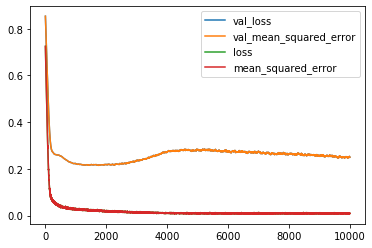

In [102]:
pd.DataFrame(history.history).plot()